# Step 1: Load data into dataframe

In [1]:
# from simiclass.data import load_10x_dataset, load_GSE_dataset
# p2data = <>
p2df = '/data/jianhao/hepatocyte_update_dataset_101619/magic_cell_mat_w_label_pd'

p2assignment = '/data/jianhao/hepatocyte_update_dataset_101619/hepa_assignment_PA249'
### [TODO] label_to_int = {cell_states: integer}
# load_dataset(p2data, p2df, p2fc, p2assignment)
p2label_convert_dict = '/data/jianhao/hepatocyte_update_dataset_101619/label_to_integer_dict_pickle'

label_to_int = {'PN14': 0,
               'Adult': 1,
               'PHx24': 2,
               'PHx48': 3,
               'PHx96': 4}
import pickle
with open(p2label_convert_dict, 'wb') as f:
    pickle.dump(label_to_int, f)

# Step 2: Perform simicLASSO and save weights

In [2]:
# from simiclasso.clus_regression import simicLASSO_op

k_cluster = 5
similarity = True
p2tf = '/home/jianhao2/simicLASSO_git/data/diff_gene_list/TF_ids_human_protein_atlas_pickle'
p2saved_file = '/data/jianhao/200TF_1000Target_w_r2_stderror_NF_100_l1e-2_l2e-5'
num_target_genes = 1000
num_TFs = 200

# num_rep = [number of repeated experiments]
# max_rcd_iter = 500000 # by default
# simicLASSO_op(p2df, p2fc, p2assignment, k_cluster, 
#     similarity, p2tf, p2saved_file, num_target_genes, gene_list_type,
#     num_rep, max_rcd_iter)

# Step 3: Evaluate weights and derived GRNs

In [3]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
import numpy as np
import ipdb
import copy
plt.rcParams['figure.dpi'] = 200

In [4]:
# p2saved_file = '/data/jianhao/hepatocyte_update_dataset_101619/magic_data_True_similarity_1000_target'
# p2saved_file = '/data/jianhao/updated_dict_w_std_and_r2_pickle'
with open(p2saved_file, 'rb') as f:
    results_all = pickle.load(f)
    
results_all.keys()

dict_keys(['weight_dic', 'adjusted_r_squared', 'standard_error', 'TF_ids', 'query_targets'])

In [5]:
weight_dic = results_all['weight_dic']
TF_ids = results_all['TF_ids']
target_ids = results_all['query_targets']
print('length of TF: ',len(TF_ids))

for label in weight_dic:
    print(weight_dic[label].shape)
    break

length of TF:  200
(201, 1000)


In [6]:
# print(weight_dic)

In [7]:
def invert_dict(in_dict):
    out_dict = {}
    for k in in_dict.keys():
        val = in_dict[k]
        out_dict[val] = k
    return out_dict

with open(p2label_convert_dict, 'rb') as f:
    label2int_dict = pickle.load(f)

int2label_dict = invert_dict(label2int_dict)

# AUCell

In [8]:
import pandas as pd

In [9]:
original_df = pd.read_pickle(p2df)
original_df.columns = map(str.upper, original_df.columns)
original_df

RP1     SOX17    MRPL15    LYPLA1   GM37988  \
PN14_AAACCCAAGAAATGGG   0.004854  0.000539  0.591115  0.366935  0.000315   
PN14_AAACCCAAGCTGAGTG   0.004455  0.001884  0.358050  0.271369  0.000951   
PN14_AAACCCACAACGTTAC   0.004492  0.001639  0.388067  0.285322  0.000816   
PN14_AAACCCAGTGCAATAA   0.004453  0.001879  0.358323  0.271515  0.000947   
PN14_AAACCCAGTGCTCCGA   0.004463  0.001848  0.362035  0.273399  0.000929   
...                          ...       ...       ...       ...       ...   
PHx96_TTTGGTTGTACCCGAC -0.000623  0.000605  1.137205  0.697996 -0.000048   
PHx96_TTTGGTTTCCAGTGTA  0.000141 -0.000569  0.940362  0.768103 -0.000276   
PHx96_TTTGGTTTCCATGATG -0.000056 -0.000831  0.883037  0.738153 -0.000483   
PHx96_TTTGTTGCAAGCTACT  0.003265  0.002349  0.657112  1.464797 -0.000965   
PHx96_TTTGTTGTCTTACGTT -0.000618  0.000320  1.127883  0.717300  0.000127   

                           TCEA1   ATP6V1H    RB1CC1  4732440D04RIK    PCMTD1  \
PN14_AAACCCAAGAAATGGG   0.239336  0.120199  0.113393       0.002072  0.323168   
PN14_AAACCCAAGCTGAGTG   0.142879  0.088292  0.108493       0.003443  0.247182   
PN14_AAACCCACAACGTTAC   0.155048  0.092182  0.108365       0.003189  0.256612   
PN14_AAACCCAGTGCAATAA   0.143037  0.088365  0.108483       0.003443  0.247273   
PN14_AAACCCAGTGCTCCGA   0.144476  0.088859  0.108497       0.003409  0.248508   
...                          ...       ...       ...            ...       ...   
PHx96_TTTGGTTGTACCCGAC  0.472497  0.185700  0.190232      -0.000664  0.583412   
PHx96_TTTGGTTTCCAGTGTA  0.415704  0.176906  0.225551       0.003126  0.655176   
PHx96_TTTGGTTTCCATGATG  0.388767  0.159912  0.214883       0.002815  0.619076   
PHx96_TTTGTTGCAAGCTACT  0.585532  0.355755  0.569388       0.017105  1.287136   
PHx96_TTTGTTGTCTTACGTT  0.478653  0.192084  0.204045      -0.000302  0.602439   

                        ...    GM9465   GM31508  AC154311.1        FBXO40  \
PN14_AAACCCAAGAAATGGG   ...  0.000111 -0.000066    0.000232 -1.373859e-05   
PN14_AAACCCAAGCTGAGTG   ...  0.000028  0.000041   -0.000073  9.781208e-07   
PN14_AAACCCACAACGTTAC   ...  0.000021  0.000021   -0.000035 -2.123797e-06   
PN14_AAACCCAGTGCAATAA   ...  0.000027  0.000041   -0.000072  9.464348e-07   
PN14_AAACCCAGTGCTCCGA   ...  0.000026  0.000038   -0.000068  4.196861e-07   
...                     ...       ...       ...         ...           ...   
PHx96_TTTGGTTGTACCCGAC  ...  0.001488  0.000498    0.002821  1.312452e-03   
PHx96_TTTGGTTTCCAGTGTA  ...  0.000501  0.000726    0.002950  1.810040e-03   
PHx96_TTTGGTTTCCATGATG  ...  0.000426  0.000728    0.002927  1.830409e-03   
PHx96_TTTGTTGCAAGCTACT  ... -0.000112  0.000185    0.001373  2.877550e-03   
PHx96_TTTGTTGTCTTACGTT  ...  0.001469  0.000532    0.002812  1.279089e-03   

                        AC168090.1  WFIKKN1  CRISP3  PELI3     BATF2  LABEL  
PN14_AAACCCAAGAAATGGG          0.0      0.0     0.0    0.0  0.000152   PN14  
PN14_AAACCCAAGCTGAGTG          0.0      0.0     0.0    0.0 -0.000062   PN14  
PN14_AAACCCACAACGTTAC          0.0      0.0     0.0    0.0 -0.000038   PN14  
PN14_AAACCCAGTGCAATAA          0.0      0.0     0.0    0.0 -0.000062   PN14  
PN14_AAACCCAGTGCTCCGA          0.0      0.0     0.0    0.0 -0.000059   PN14  
...                            ...      ...     ...    ...       ...    ...  
PHx96_TTTGGTTGTACCCGAC         0.0      0.0     0.0    0.0  0.001682  PHx96  
PHx96_TTTGGTTTCCAGTGTA         0.0      0.0     0.0    0.0  0.001591  PHx96  
PHx96_TTTGGTTTCCATGATG         0.0      0.0     0.0    0.0  0.001548  PHx96  
PHx96_TTTGTTGCAAGCTACT         0.0      0.0     0.0    0.0  0.000824  PHx96  
PHx96_TTTGTTGTCTTACGTT         0.0      0.0     0.0    0.0  0.001749  PHx96  

[18272 rows x 15091 columns]

In [10]:
# step 1: normalized weight matrix by target expression.
print(target_ids[:3])
print(weight_dic[0].shape)

target_df = original_df[target_ids]
target_norms = np.linalg.norm(target_df, axis = 0)

['FDFT1', 'SS18L2', 'ERRFI1']
(201, 1000)


In [11]:
normalized_weights = {}
for label in weight_dic:
    normalized_mat = weight_dic[label] / target_norms
    normalized_weights[label] = normalized_mat[:len(TF_ids), :]
print(normalized_weights[0].shape)

(200, 1000)


In [12]:
# verified target expression normalization.
# a = np.array([[4, 2, 3], [8, 4, 6], [2, 1, 1.5]])
# b = [4, 2, 3]
# a / b

### array([[1. , 1. , 1. ],
###        [2. , 2. , 2. ],
###        [0.5, 0.5, 0.5]])

In [21]:
def cal_AUC(row_series_in, weight_series_in):
    df_new = pd.concat([row_series_in, row_series_in], axis = 1).T
    df_new = df_new.reset_index(drop = True)
    df_new.loc[1] = weight_series_in
    df_new.fillna(0)
#     ipdb.set_trace()
    df_sorted_by_row = df_new.sort_values(axis = 1, by = 0, ascending = False)
    len_of_genes = len(weight_series_in)
    running_sum = [np.sum(df_sorted_by_row.loc[1].values[:x+1]) for x in range(len_of_genes)]
    AUC_score = np.sum(running_sum) / (np.sum(weight_series_in) * len_of_genes)
    return AUC_score
    
    
    
def get_AUCell_mat(original_df, weight_dict, TF_ids, target_ids, threshold = None):
    '''
    weight_mat: # num_TFs * num_Targets.
    target_ids: all targets, thresholding should only change the value to 0, not removing.
    '''
    df_in = original_df.reset_index(drop = True)
    original_index = original_df.index
    AUC_dict = {}
    for label in weight_dict:
        weight_mat = np.abs(weight_dict[label])
        AUC_mat = np.zeros([df_in.shape[0], len(TF_ids)])
        for row in df_in.iterrows():
            tmp_AUC_row = np.zeros(len(TF_ids))
            row_idx = row[0]
            row_series_in = row[1][:len(TF_ids)]
            for tf_idx in range(len(TF_ids)):
                weight_series_in = pd.Series(data = weight_mat[tf_idx, :], index = target_ids)
                AUC_score = cal_AUC(row_series_in, weight_series_in)
                tmp_AUC_row[tf_idx] = AUC_score
            AUC_mat[row_idx, :] = tmp_AUC_row
            
        AUC_dict[label] = pd.DataFrame(data=AUC_mat, columns = TF_ids, index=original_index)
    
    return AUC_dict

In [ ]:
AUC_dict = get_AUCell_mat(original_df, normalized_weights, TF_ids, target_ids)

In [ ]:
AUC_dict

# Draw histogram and see states transition

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipdb
import copy
plt.rcParams['figure.dpi'] = 200

In [2]:
p2AUC_dict = '/data/jianhao/hepatocyte_update_dataset_101619/AUC_dict_hepa_monoc_states'
with open(p2AUC_dict, 'rb') as f:
    AUC_dict = pickle.load(f)
print(AUC_dict.keys())
AUC_dict[1]

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


NCOA2     STAT1   LRRFIP1      HES6      ELK4  \
PN14_AAACCCAAGAAATGGG   0.469232  0.470952  0.454461  0.487105  0.461046   
PN14_AAACCCAAGCTGAGTG   0.466252  0.464435  0.463276  0.477006  0.447747   
PN14_AAACCCACAACGTTAC   0.463755  0.466424  0.462978  0.482318  0.450950   
PN14_AAACCCAGTGCAATAA   0.466210  0.464414  0.463283  0.476985  0.447760   
PN14_AAACCCAGTGCTCCGA   0.464476  0.465817  0.462876  0.480269  0.450652   
...                          ...       ...       ...       ...       ...   
PHx96_TTTGGTTGTACCCGAC  0.465428  0.468995  0.468687  0.475353  0.461140   
PHx96_TTTGGTTTCCAGTGTA  0.473498  0.469467  0.458485  0.482501  0.461630   
PHx96_TTTGGTTTCCATGATG  0.471719  0.471071  0.466929  0.482573  0.459615   
PHx96_TTTGTTGCAAGCTACT  0.446925  0.446836  0.450449  0.461142  0.449889   
PHx96_TTTGTTGTCTTACGTT  0.465957  0.465494  0.473626  0.470359  0.457809   

                           NR5A2      ATF6     NR1I3     PROX1      IRF6  ...  \
PN14_AAACCCAAGAAATGGG   0.448823  0.457934  0.456745  0.471252  0.479623  ...   
PN14_AAACCCAAGCTGAGTG   0.428467  0.455103  0.435071  0.461467  0.479215  ...   
PN14_AAACCCACAACGTTAC   0.429347  0.458030  0.435205  0.457974  0.474159  ...   
PN14_AAACCCAGTGCAATAA   0.428497  0.455153  0.435060  0.461527  0.479176  ...   
PN14_AAACCCAGTGCTCCGA   0.430300  0.454765  0.435785  0.460001  0.479086  ...   
...                          ...       ...       ...       ...       ...  ...   
PHx96_TTTGGTTGTACCCGAC  0.458470  0.469335  0.462568  0.460564  0.465459  ...   
PHx96_TTTGGTTTCCAGTGTA  0.444942  0.461073  0.455626  0.473048  0.478671  ...   
PHx96_TTTGGTTTCCATGATG  0.448676  0.458220  0.453759  0.472376  0.476060  ...   
PHx96_TTTGTTGCAAGCTACT  0.450495  0.453167  0.468187  0.466108  0.441474  ...   
PHx96_TTTGTTGTCTTACGTT  0.459847  0.468113  0.463721  0.457644  0.463642  ...   

                           CXXC1      MBD1     TSHZ1     KDM2A      RELA  \
PN14_AAACCCAAGAAATGGG   0.474116  0.440644  0.476197  0.459513  0.474296   
PN14_AAACCCAAGCTGAGTG   0.463489  0.443502  0.459059  0.450397  0.463970   
PN14_AAACCCACAACGTTAC   0.468354  0.444258  0.461274  0.453807  0.463955   
PN14_AAACCCAGTGCAATAA   0.463510  0.443505  0.458978  0.450368  0.463972   
PN14_AAACCCAGTGCTCCGA   0.466840  0.442018  0.459887  0.451598  0.468432   
...                          ...       ...       ...       ...       ...   
PHx96_TTTGGTTGTACCCGAC  0.456438  0.463032  0.453607  0.458201  0.473370   
PHx96_TTTGGTTTCCAGTGTA  0.462734  0.457563  0.476796  0.472691  0.473340   
PHx96_TTTGGTTTCCATGATG  0.463365  0.459830  0.475738  0.475413  0.472385   
PHx96_TTTGTTGCAAGCTACT  0.447941  0.463059  0.459723  0.463390  0.475761   
PHx96_TTTGTTGTCTTACGTT  0.455979  0.466141  0.455221  0.453353  0.472877   

                           ZFP91      KLF9      HHEX      MXI1    TCF7L2  
PN14_AAACCCAAGAAATGGG   0.480134  0.462091  0.473554  0.492261  0.465211  
PN14_AAACCCAAGCTGAGTG   0.457979  0.464821  0.470030  0.477689  0.455479  
PN14_AAACCCACAACGTTAC   0.456234  0.466816  0.480702  0.482550  0.457440  
PN14_AAACCCAGTGCAATAA   0.457948  0.464834  0.470017  0.477664  0.455486  
PN14_AAACCCAGTGCTCCGA   0.457349  0.466105  0.473361  0.479770  0.453628  
...                          ...       ...       ...       ...       ...  
PHx96_TTTGGTTGTACCCGAC  0.463636  0.466445  0.482598  0.451667  0.472029  
PHx96_TTTGGTTTCCAGTGTA  0.473756  0.485945  0.482644  0.461439  0.469551  
PHx96_TTTGGTTTCCATGATG  0.475221  0.484963  0.478107  0.462365  0.471838  
PHx96_TTTGTTGCAAGCTACT  0.439031  0.479665  0.479876  0.447834  0.467175  
PHx96_TTTGTTGTCTTACGTT  0.468055  0.473788  0.479694  0.455034  0.470783  

[18272 rows x 200 columns]

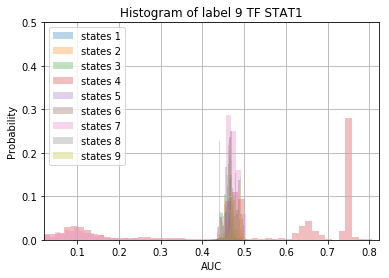

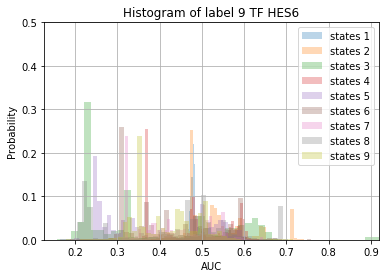

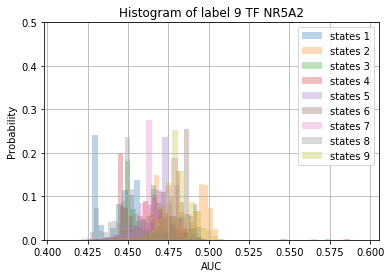

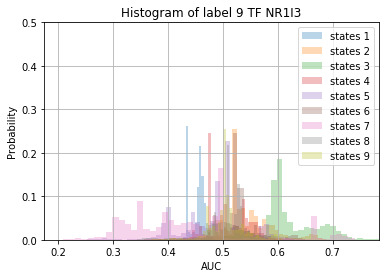

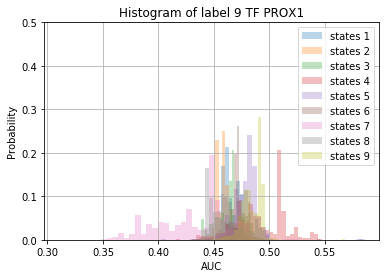

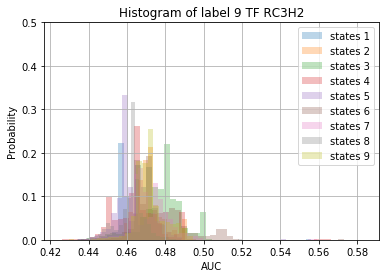

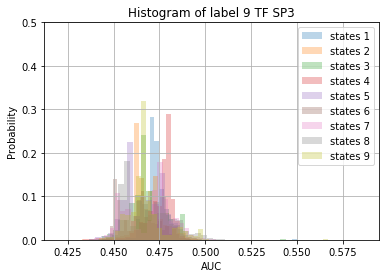

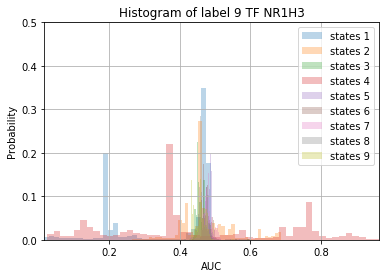

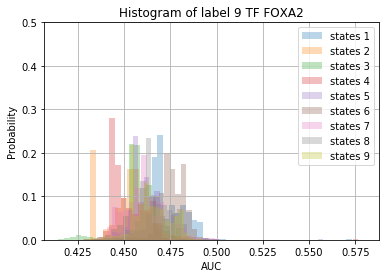

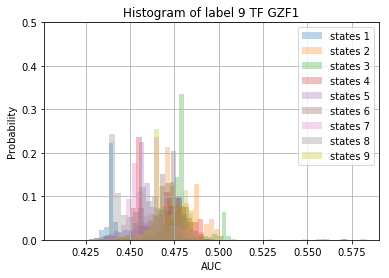

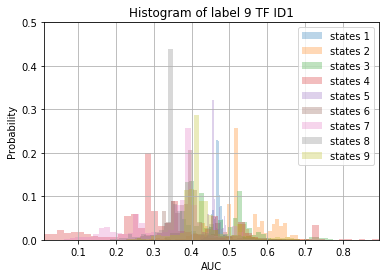

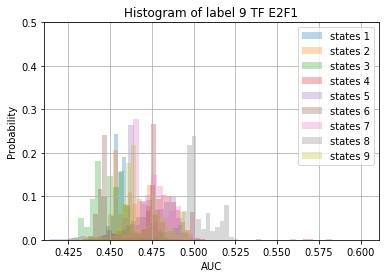

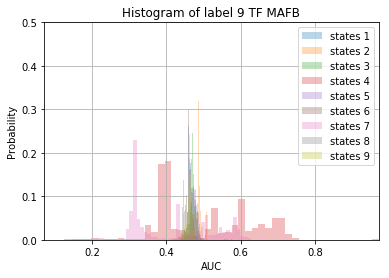

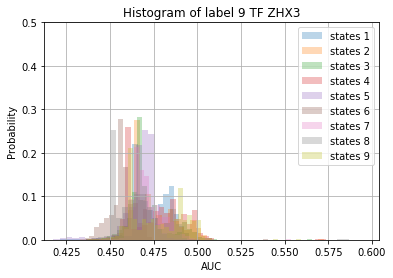

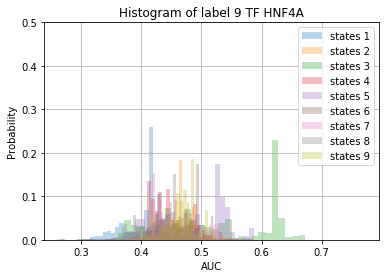

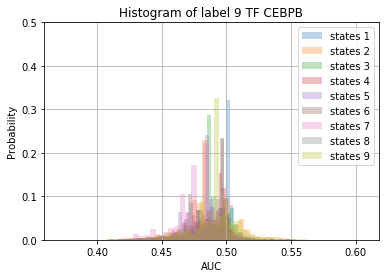

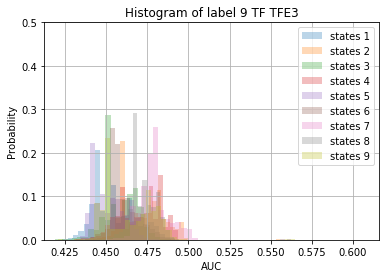

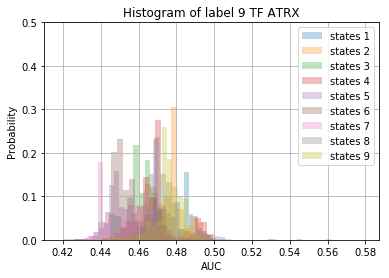

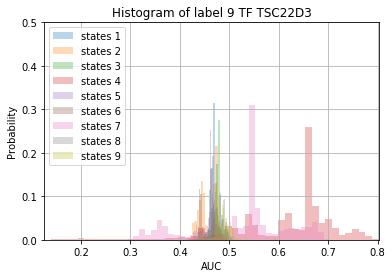

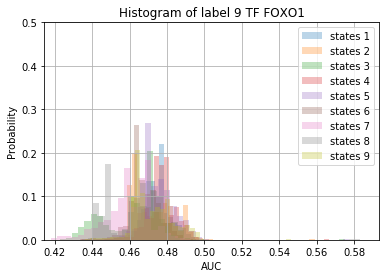

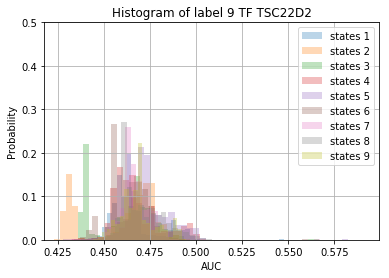

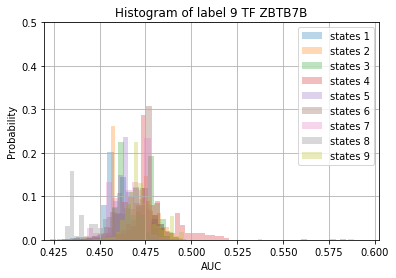

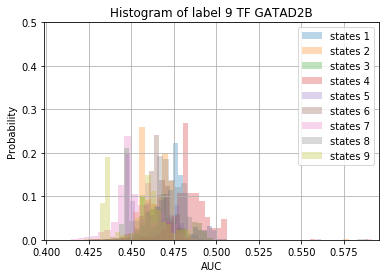

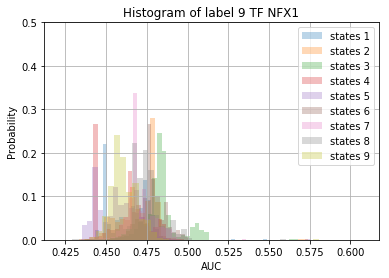

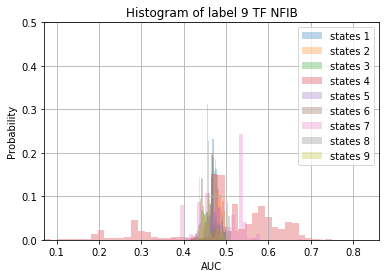

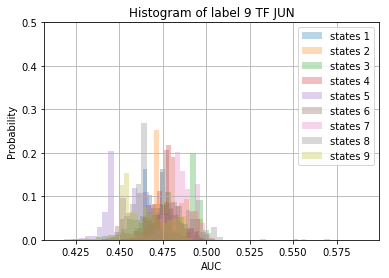

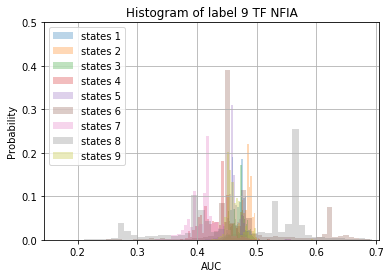

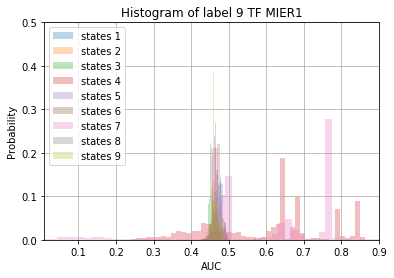

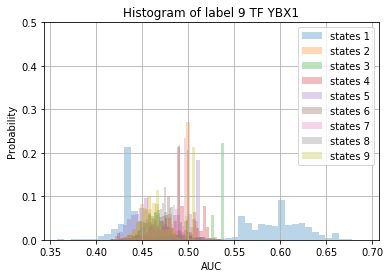

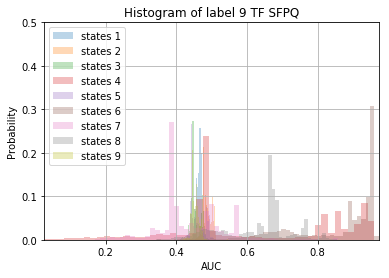

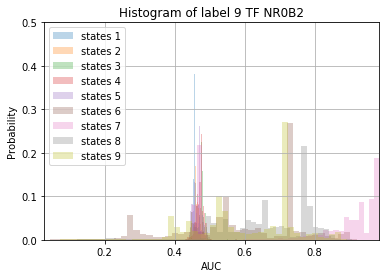

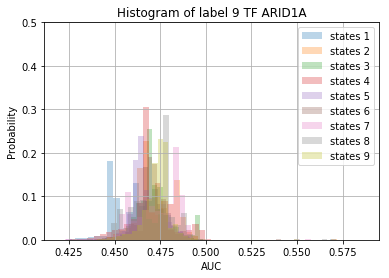

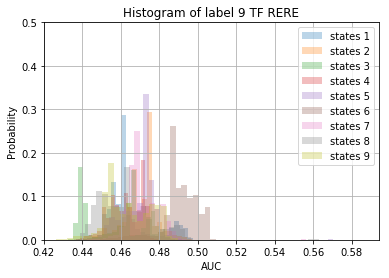

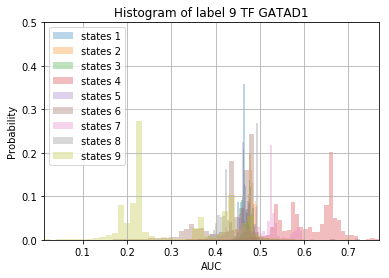

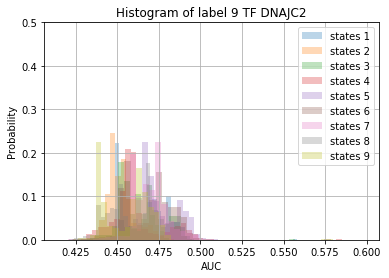

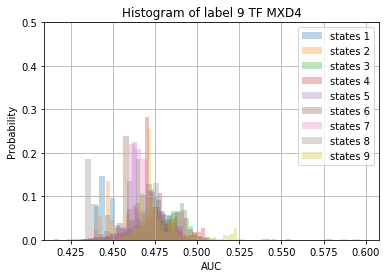

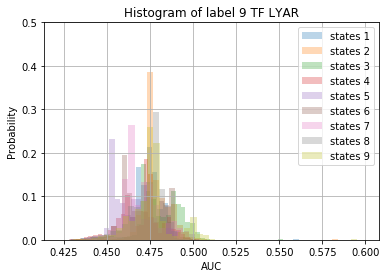

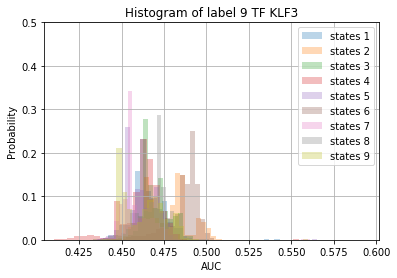

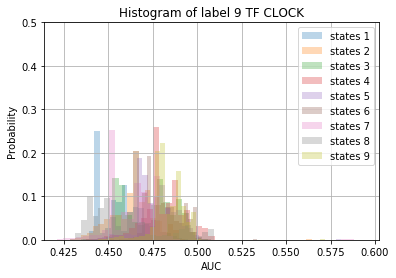

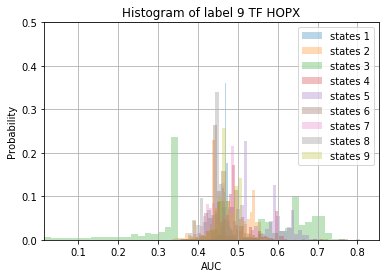

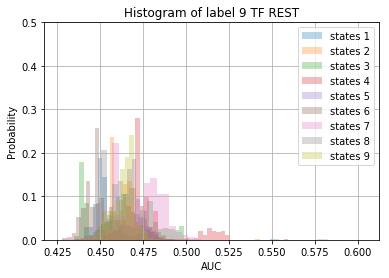

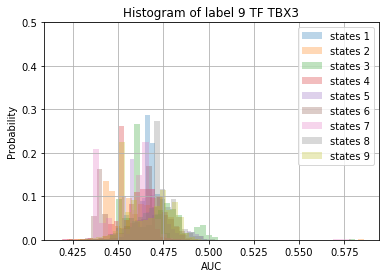

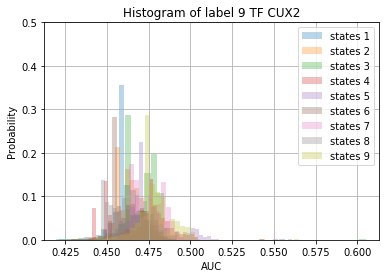

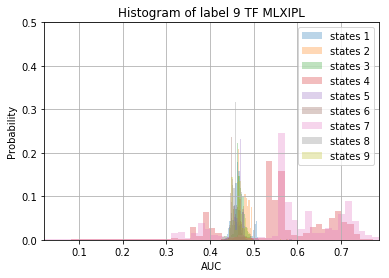

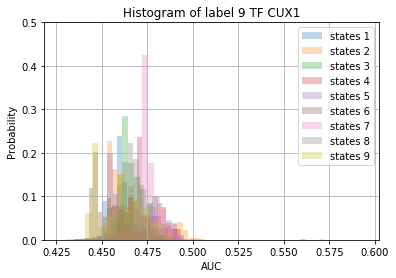

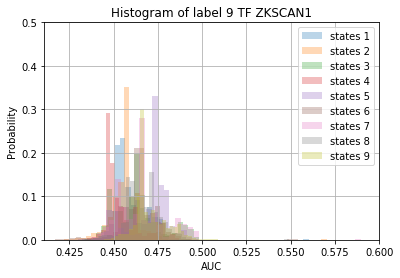

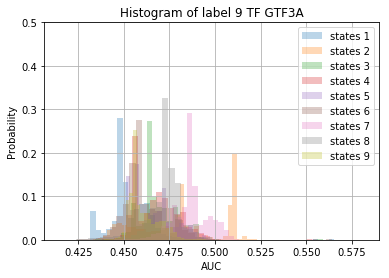

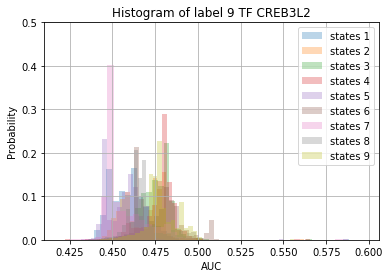

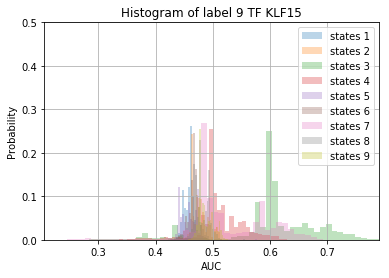

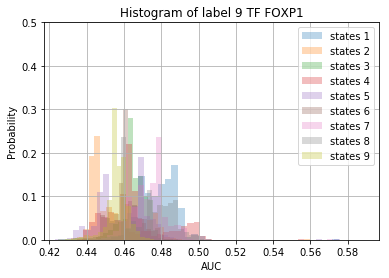

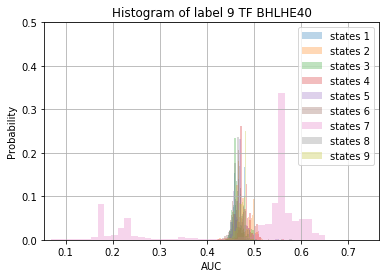

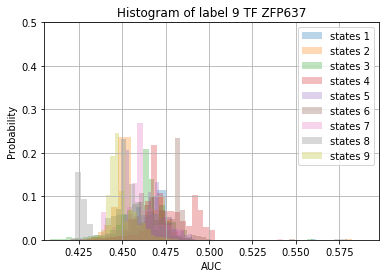

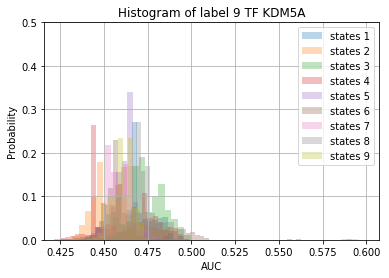

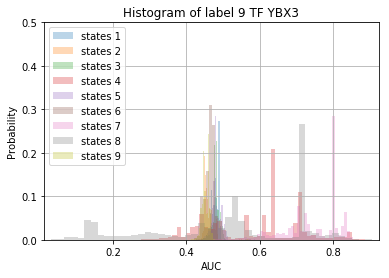

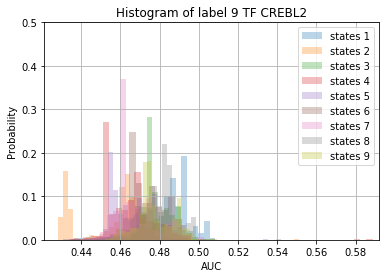

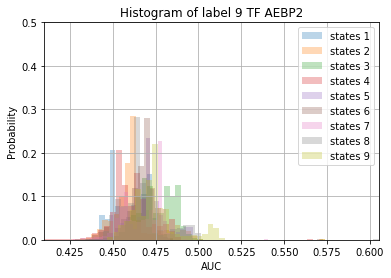

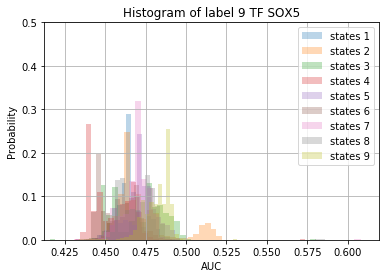

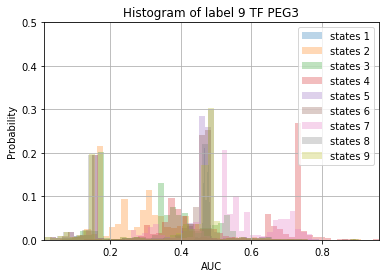

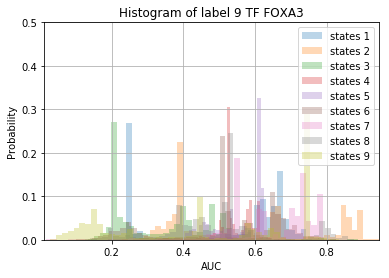

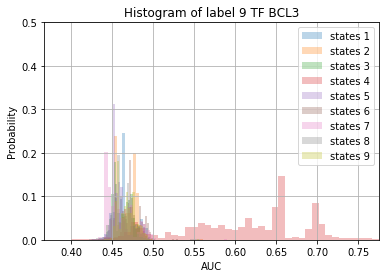

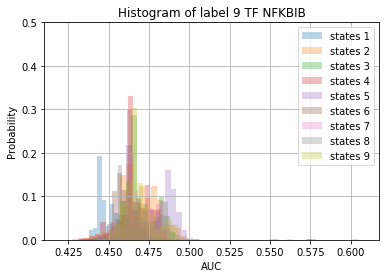

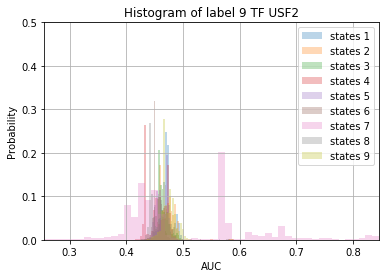

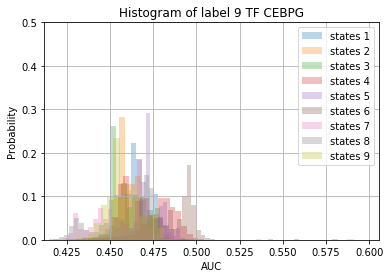

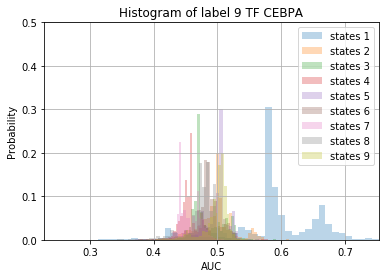

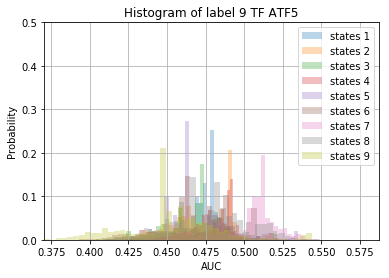

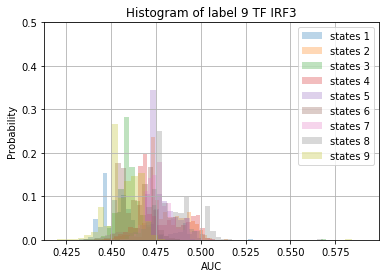

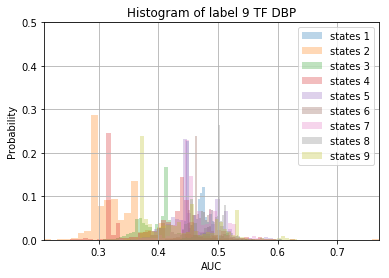

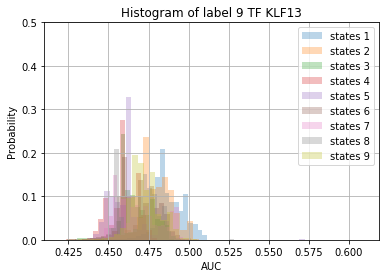

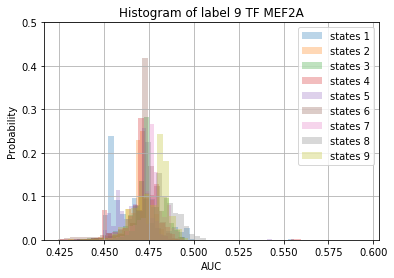

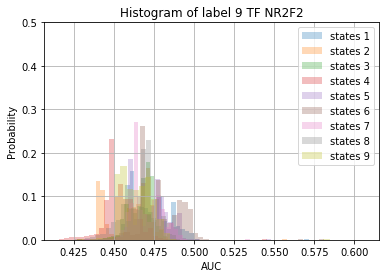

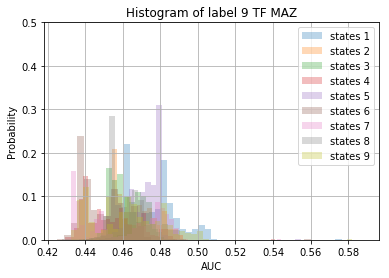

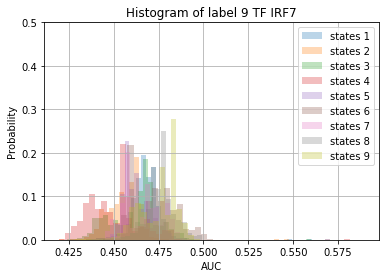

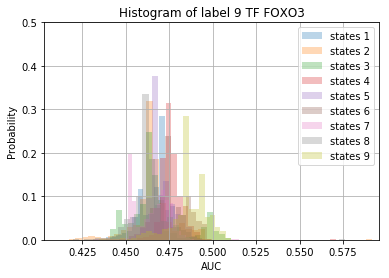

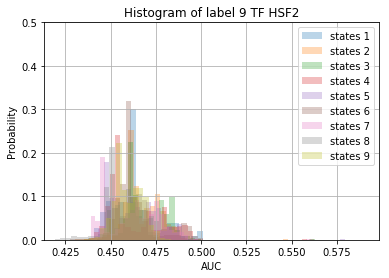

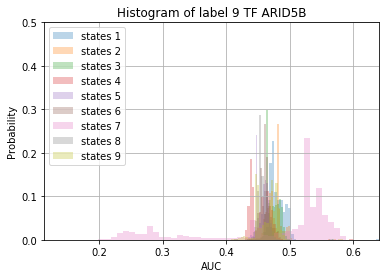

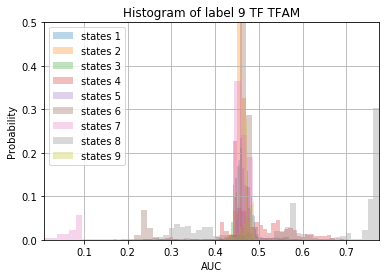

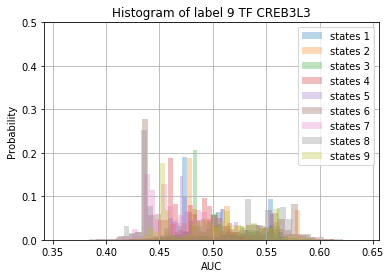

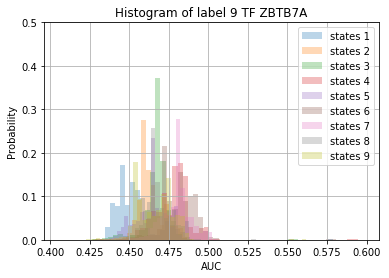

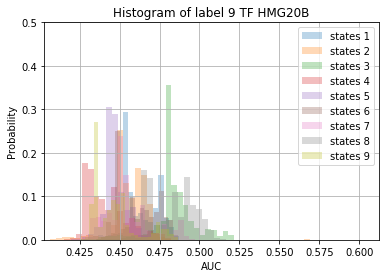

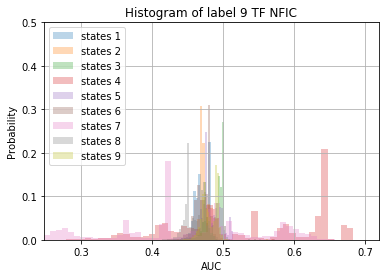

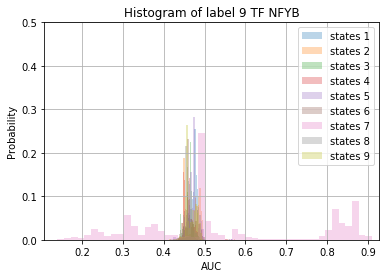

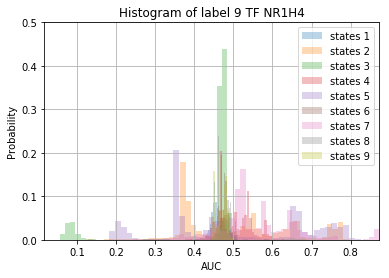

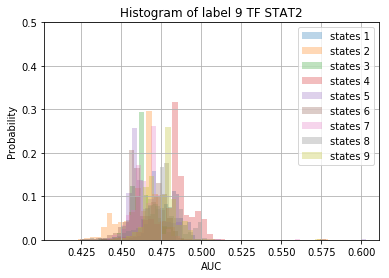

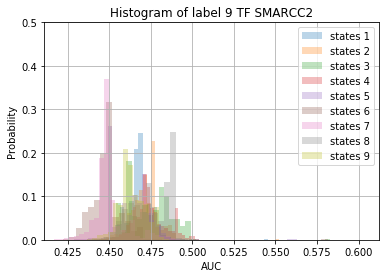

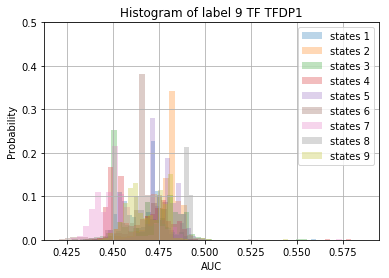

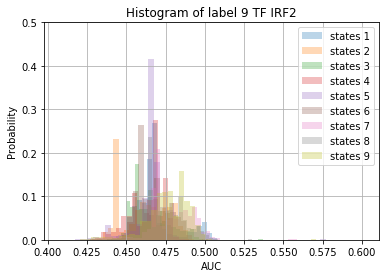

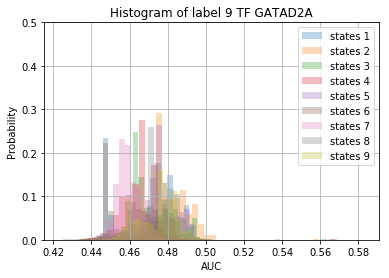

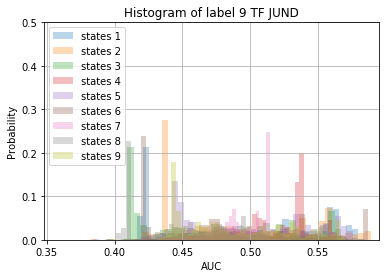

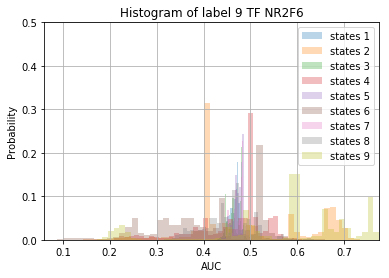

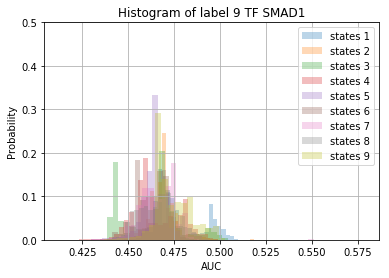

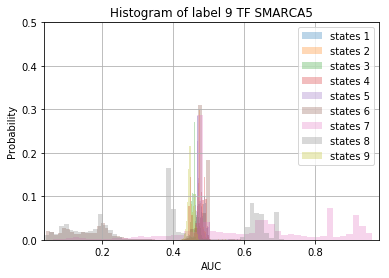

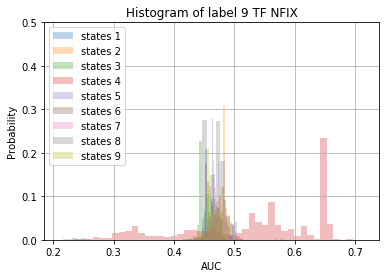

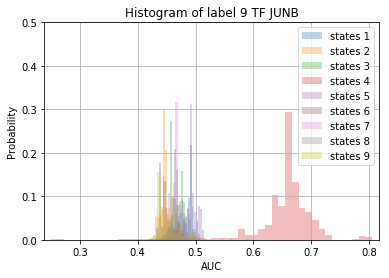

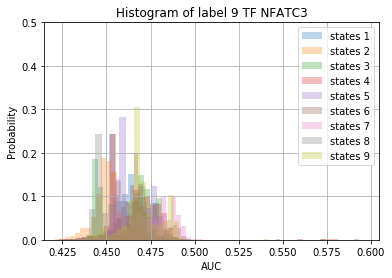

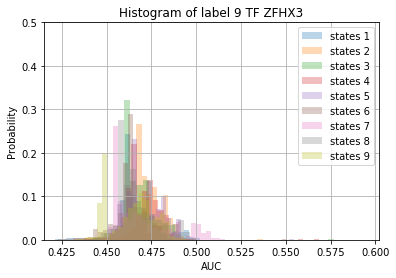

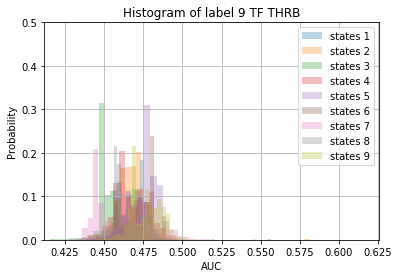

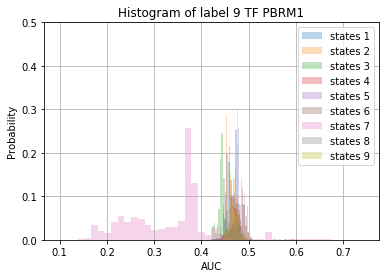

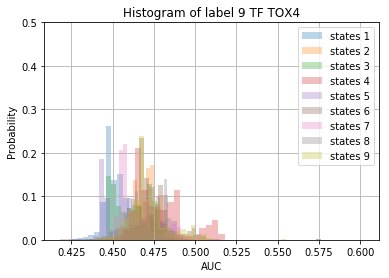

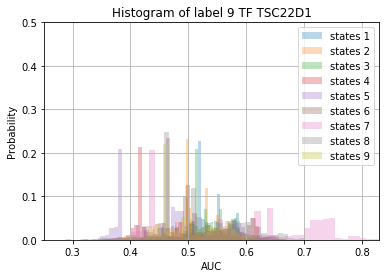

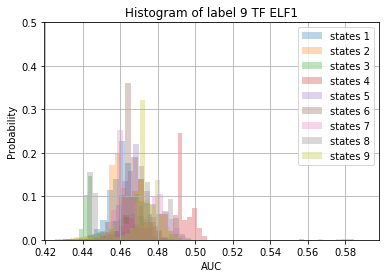

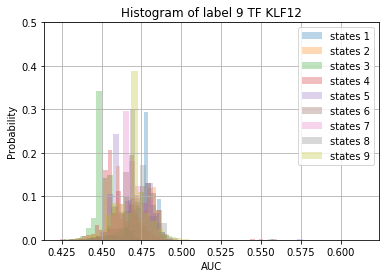

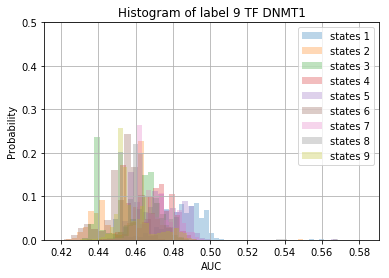

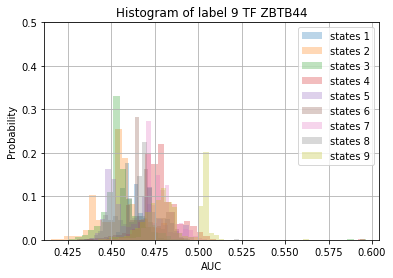

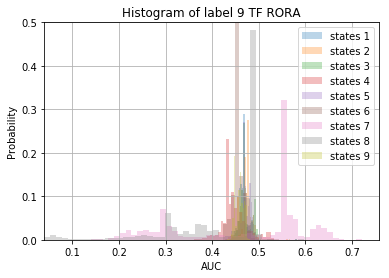

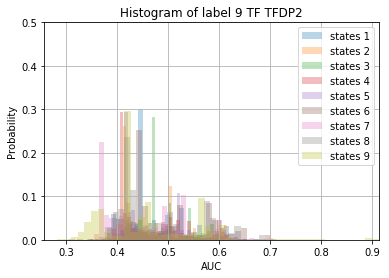

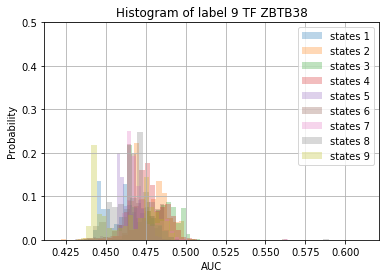

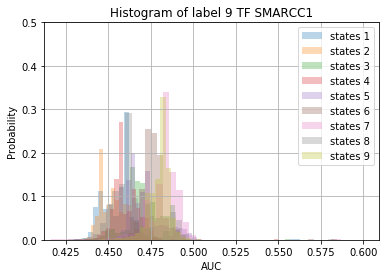

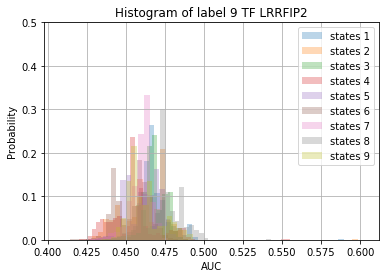

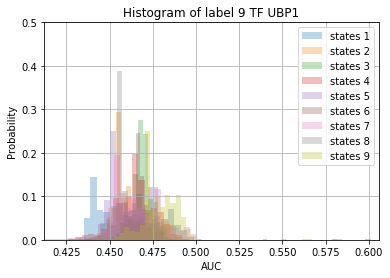

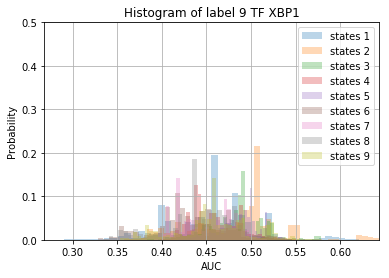

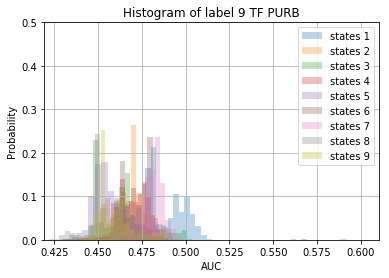

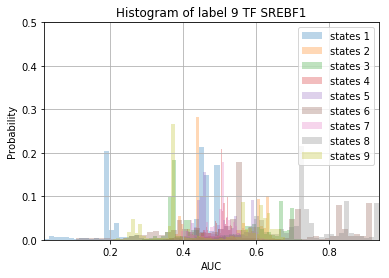

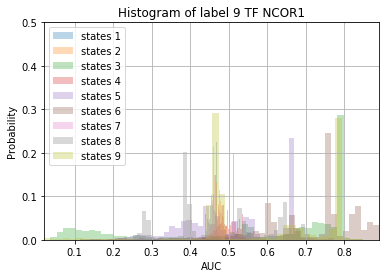

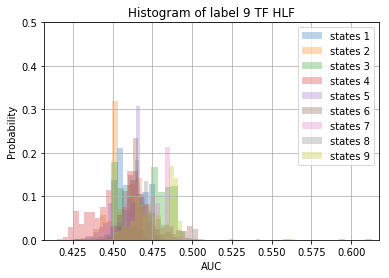

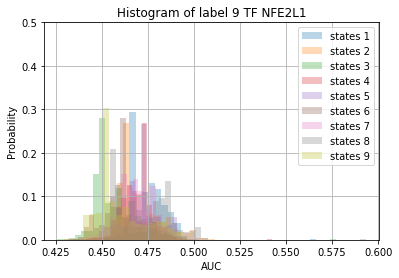

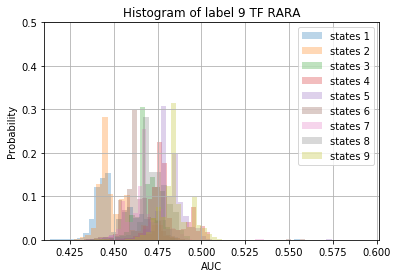

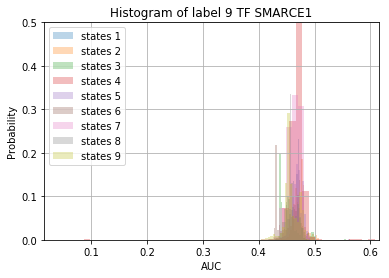

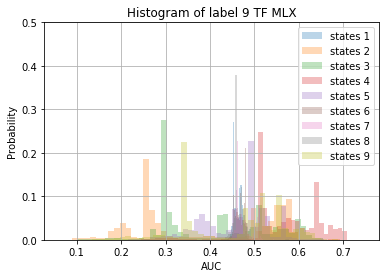

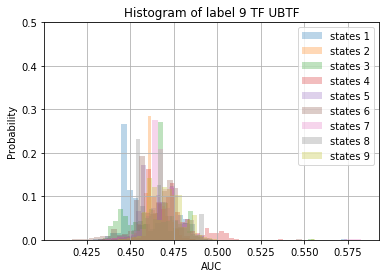

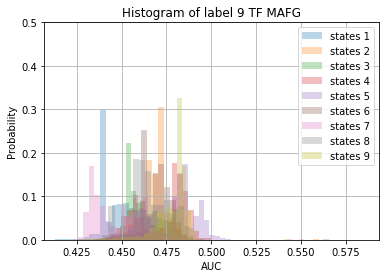

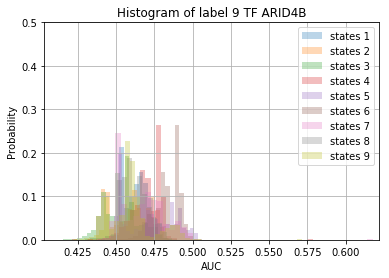

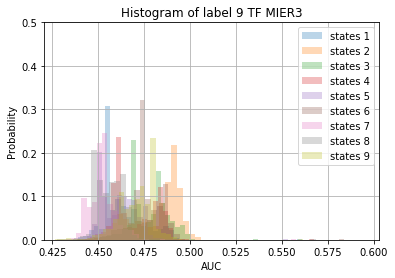

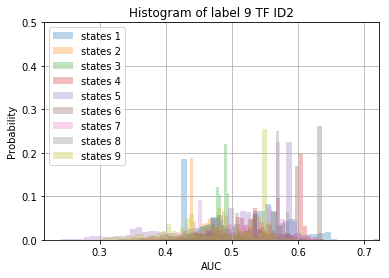

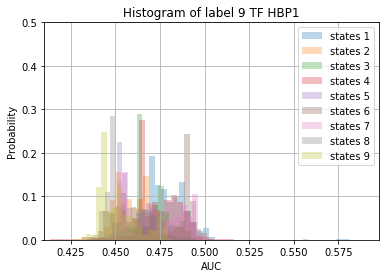

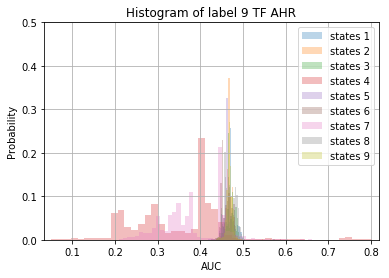

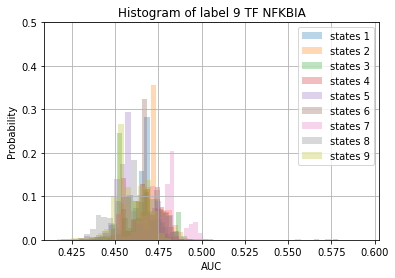

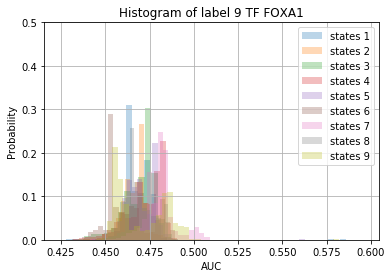

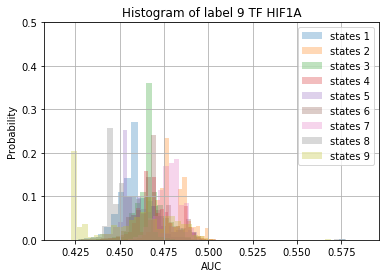

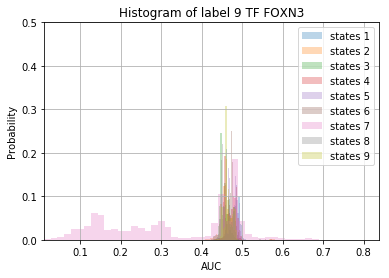

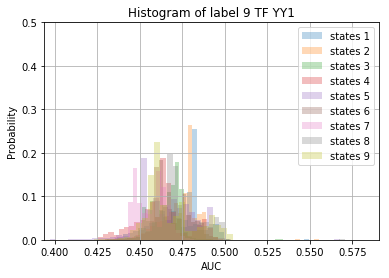

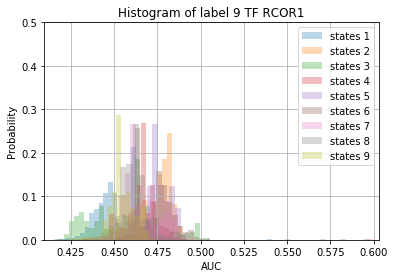

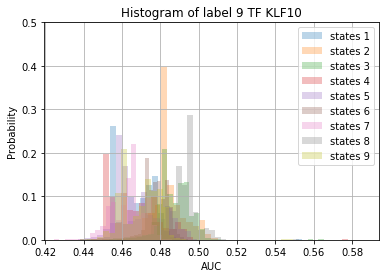

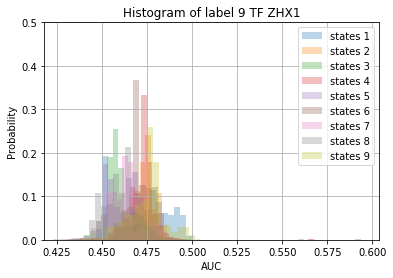

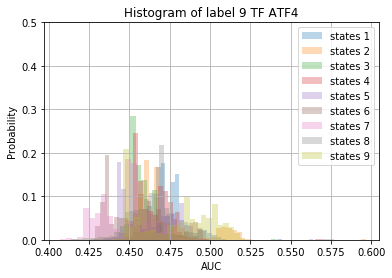

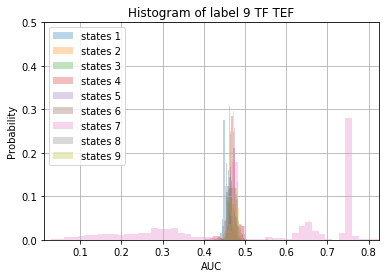

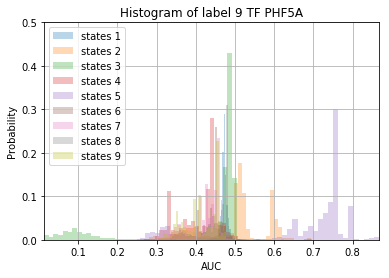

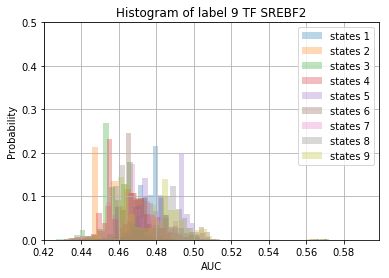

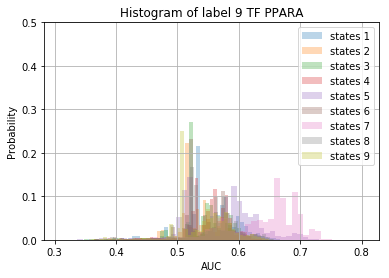

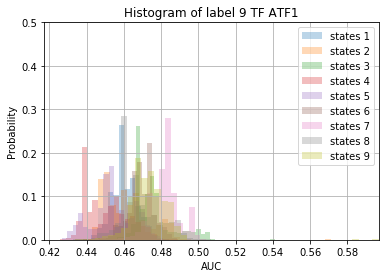

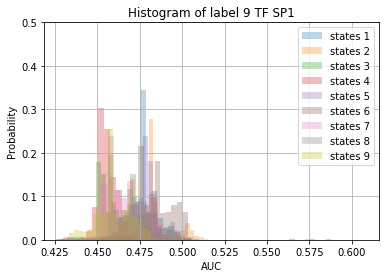

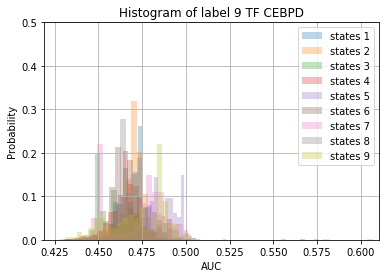

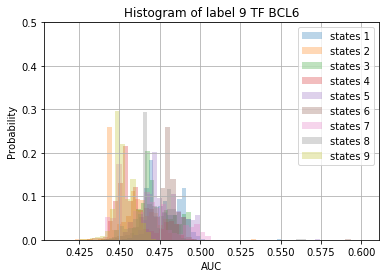

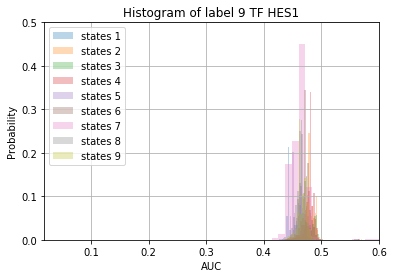

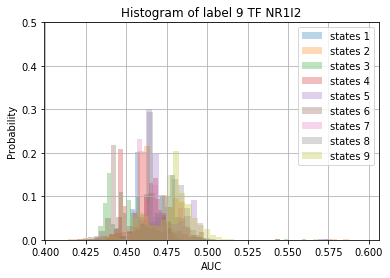

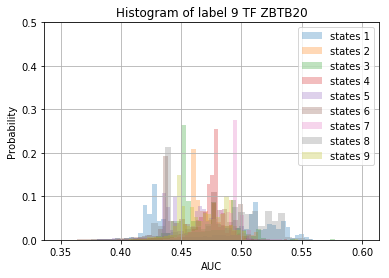

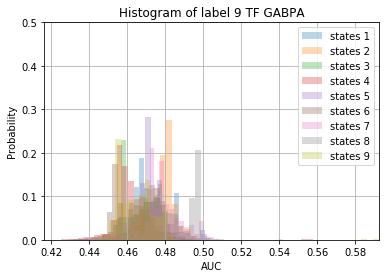

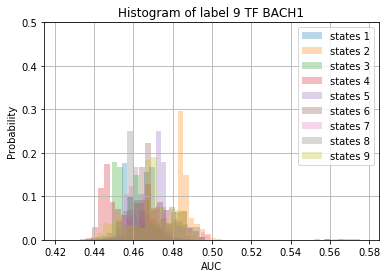

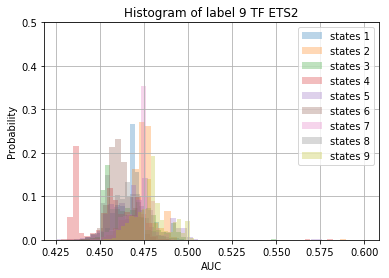

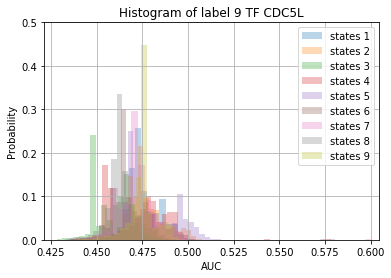

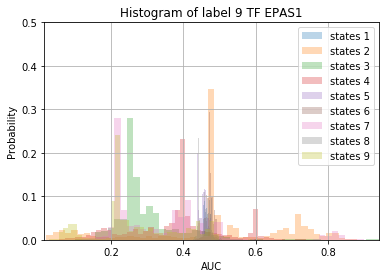

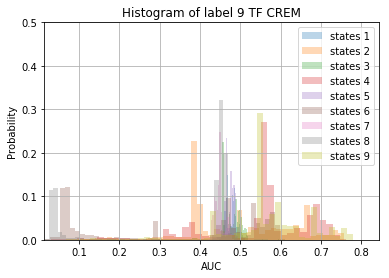

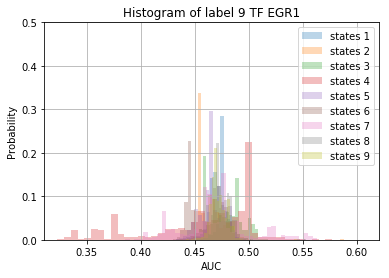

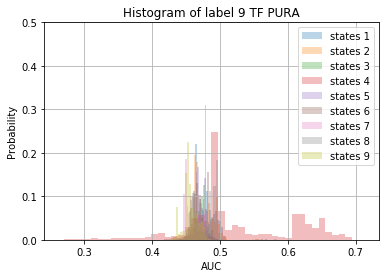

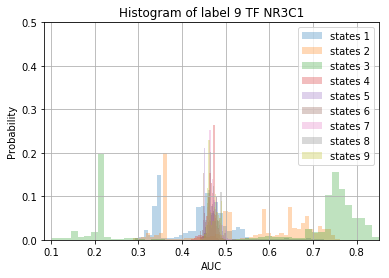

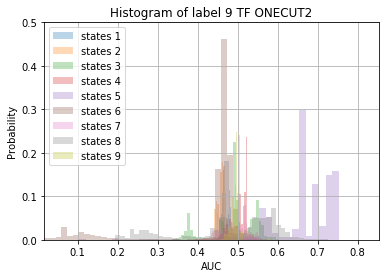

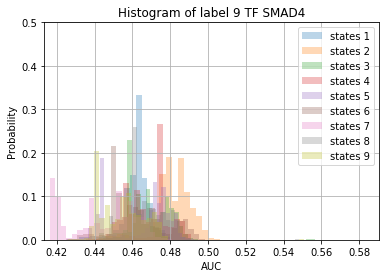

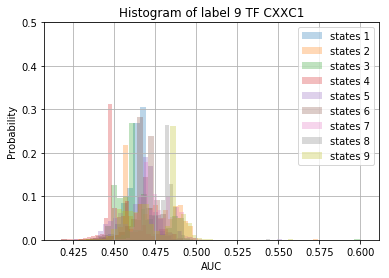

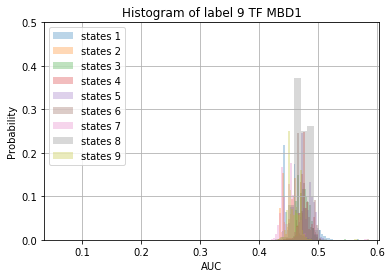

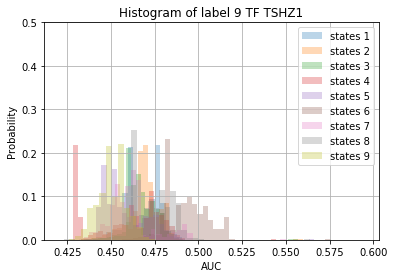

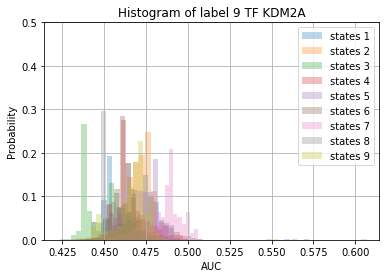

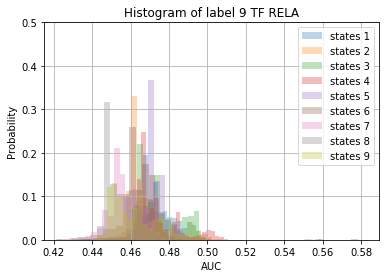

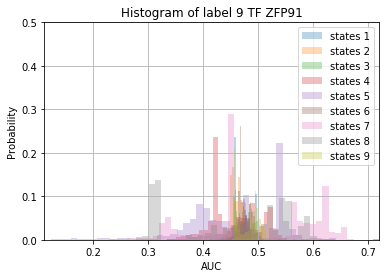

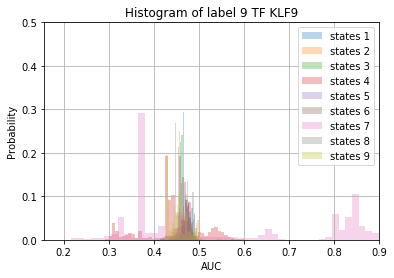

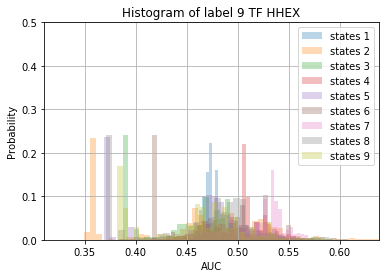

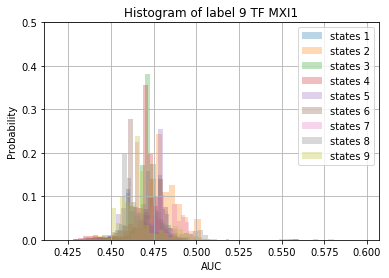

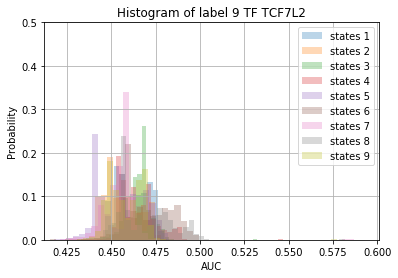

In [33]:
x_min = np.ones(200)
x_max = -1 * np.ones(200)
# find min and max of AUC values in all states.
for label in AUC_dict:
    min_AUC = AUC_dict[label].min(axis = 0)
    max_AUC = AUC_dict[label].max(axis = 0)
    x_min = np.minimum(min_AUC, x_min)
    x_max = np.maximum(max_AUC, x_max)

i = 20
for idx, TF in enumerate(AUC_dict[1].columns):    
#     i -= 1
    for label in AUC_dict:
        AUC_df = AUC_dict[label]      
        x = AUC_df[TF].values.tolist()
        n, bins, patches = plt.hist(x, 50, density = False, alpha = 0.3, 
                                    weights=np.ones(len(x)) / len(x),
                                   label = 'states {}'.format(label))
        plt.xlabel('AUC')
        plt.ylabel('Probability')
        plt.title('Histogram of label {} TF {}'.format(label, TF))
        plt.grid(True)
        plt.xlim(x_min[idx], x_max[idx])
        plt.ylim(0, 0.5)
    plt.legend()
    plt.show()
    
    if i < 0:
        break

# with all targets

In [34]:
p2AUC_dict = '/data/jianhao/hepatocyte_update_dataset_101619/AUC_dict_hepa_monoc_states_all_target'
with open(p2AUC_dict, 'rb') as f:
    AUC_dict = pickle.load(f)
print(AUC_dict.keys())
AUC_dict[1]

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


NCOA2     STAT1   LRRFIP1      HES6      ELK4  \
PN14_AAACCCAAGAAATGGG   0.371465  0.374052  0.373339  0.372868  0.381417   
PN14_AAACCCAAGCTGAGTG   0.372552  0.377150  0.376262  0.375593  0.384205   
PN14_AAACCCACAACGTTAC   0.372233  0.376506  0.375606  0.374943  0.383556   
PN14_AAACCCAGTGCAATAA   0.372557  0.377134  0.376248  0.375575  0.384199   
PN14_AAACCCAGTGCTCCGA   0.372548  0.377036  0.376181  0.375553  0.384149   
...                          ...       ...       ...       ...       ...   
PHx96_TTTGGTTGTACCCGAC  0.362411  0.356217  0.355576  0.362399  0.362571   
PHx96_TTTGGTTTCCAGTGTA  0.356624  0.352037  0.353316  0.357179  0.358564   
PHx96_TTTGGTTTCCATGATG  0.356496  0.352178  0.353567  0.357014  0.358657   
PHx96_TTTGTTGCAAGCTACT  0.397441  0.398839  0.402577  0.394256  0.397403   
PHx96_TTTGTTGTCTTACGTT  0.362034  0.356030  0.355314  0.362047  0.362362   

                           NR5A2      ATF6     NR1I3     PROX1      IRF6  ...  \
PN14_AAACCCAAGAAATGGG   0.370092  0.377020  0.375666  0.370947  0.369973  ...   
PN14_AAACCCAAGCTGAGTG   0.371856  0.379136  0.379007  0.373445  0.373514  ...   
PN14_AAACCCACAACGTTAC   0.371204  0.378576  0.378272  0.372836  0.372839  ...   
PN14_AAACCCAGTGCAATAA   0.371843  0.379130  0.379000  0.373418  0.373498  ...   
PN14_AAACCCAGTGCTCCGA   0.371779  0.379089  0.378979  0.373367  0.373434  ...   
...                          ...       ...       ...       ...       ...  ...   
PHx96_TTTGGTTGTACCCGAC  0.356002  0.366958  0.350563  0.350824  0.352610  ...   
PHx96_TTTGGTTTCCAGTGTA  0.350282  0.360638  0.346256  0.345270  0.350086  ...   
PHx96_TTTGGTTTCCATGATG  0.350063  0.360346  0.345986  0.345044  0.350002  ...   
PHx96_TTTGTTGCAAGCTACT  0.392322  0.399965  0.390464  0.395953  0.395351  ...   
PHx96_TTTGTTGTCTTACGTT  0.355543  0.366572  0.350066  0.350557  0.352138  ...   

                           CXXC1      MBD1     TSHZ1     KDM2A      RELA  \
PN14_AAACCCAAGAAATGGG   0.371305  0.375940  0.381003  0.374342  0.375735   
PN14_AAACCCAAGCTGAGTG   0.371565  0.378569  0.382273  0.377164  0.376051   
PN14_AAACCCACAACGTTAC   0.371331  0.377989  0.381883  0.376577  0.375625   
PN14_AAACCCAGTGCAATAA   0.371548  0.378573  0.382254  0.377156  0.376052   
PN14_AAACCCAGTGCTCCGA   0.371545  0.378511  0.382225  0.377094  0.375976   
...                          ...       ...       ...       ...       ...   
PHx96_TTTGGTTGTACCCGAC  0.354992  0.365934  0.366486  0.362674  0.369326   
PHx96_TTTGGTTTCCAGTGTA  0.346075  0.361575  0.360559  0.359495  0.361478   
PHx96_TTTGGTTTCCATGATG  0.345800  0.361518  0.360343  0.359356  0.361054   
PHx96_TTTGTTGCAAGCTACT  0.384250  0.406890  0.405327  0.405816  0.403559   
PHx96_TTTGTTGTCTTACGTT  0.354621  0.365935  0.366169  0.362468  0.368901   

                           ZFP91      KLF9      HHEX      MXI1    TCF7L2  
PN14_AAACCCAAGAAATGGG   0.370316  0.392155  0.376205  0.374230  0.374382  
PN14_AAACCCAAGCTGAGTG   0.372338  0.394058  0.380200  0.376543  0.375269  
PN14_AAACCCACAACGTTAC   0.371739  0.393618  0.379475  0.376001  0.374884  
PN14_AAACCCAGTGCAATAA   0.372300  0.394044  0.380185  0.376528  0.375267  
PN14_AAACCCAGTGCTCCGA   0.372245  0.394022  0.380119  0.376481  0.375248  
...                          ...       ...       ...       ...       ...  
PHx96_TTTGGTTGTACCCGAC  0.352058  0.372294  0.357743  0.364386  0.355199  
PHx96_TTTGGTTTCCAGTGTA  0.346522  0.367577  0.354611  0.358811  0.347050  
PHx96_TTTGGTTTCCATGATG  0.346227  0.367255  0.354300  0.358630  0.346641  
PHx96_TTTGTTGCAAGCTACT  0.389533  0.400957  0.404877  0.397280  0.390828  
PHx96_TTTGTTGTCTTACGTT  0.351708  0.371825  0.357252  0.363818  0.354877  

[18272 rows x 200 columns]

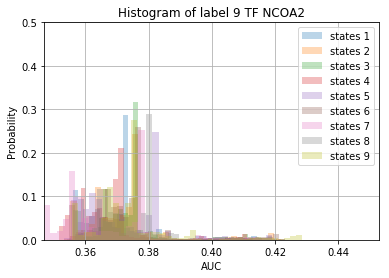

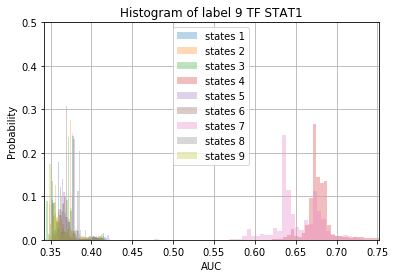

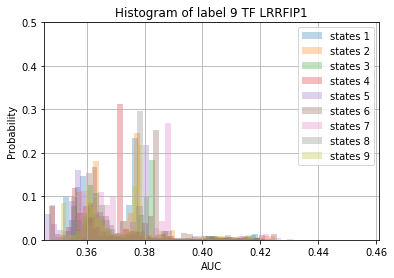

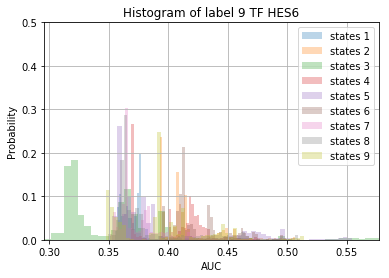

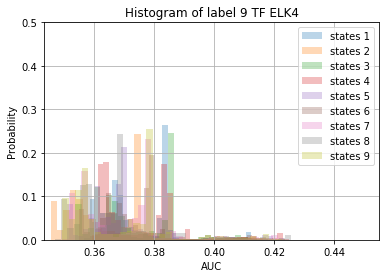

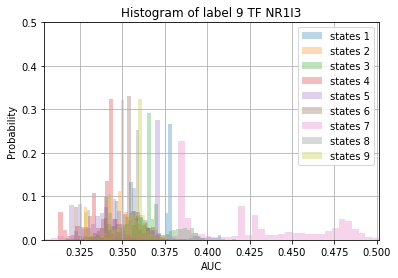

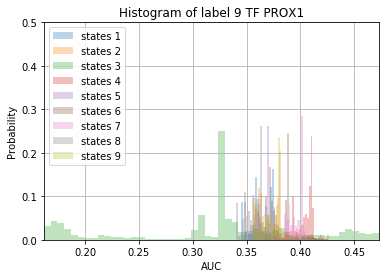

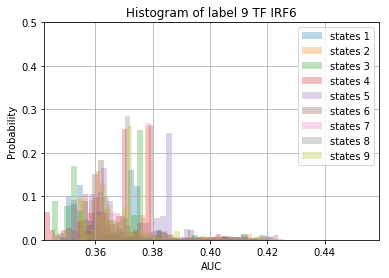

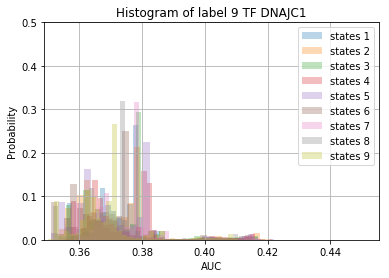

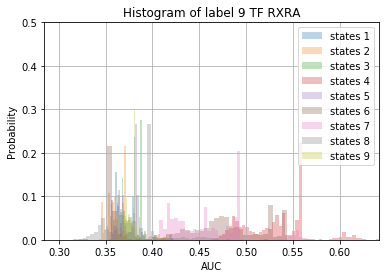

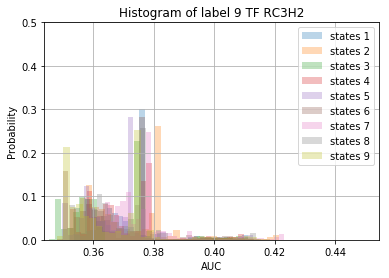

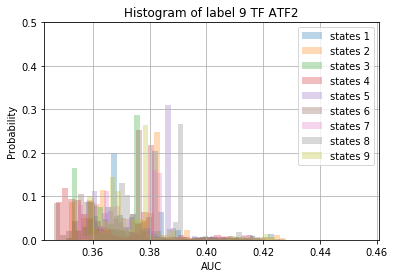

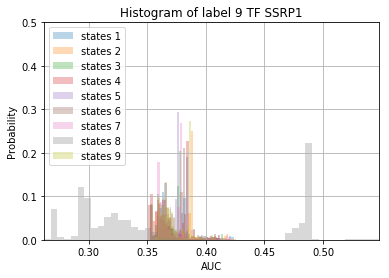

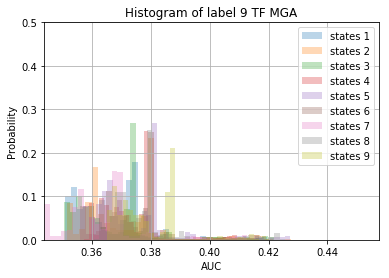

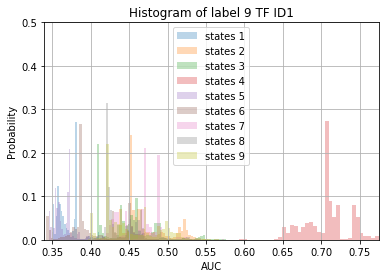

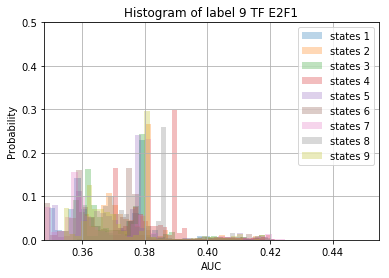

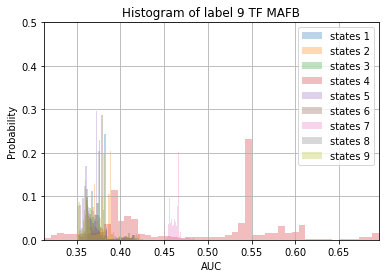

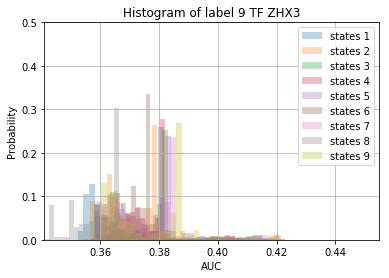

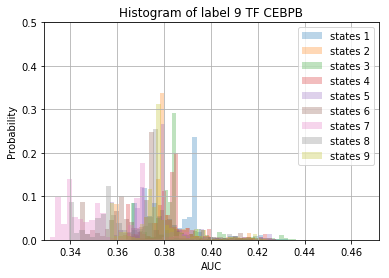

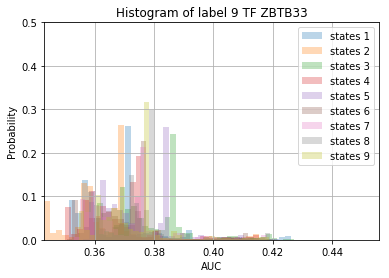

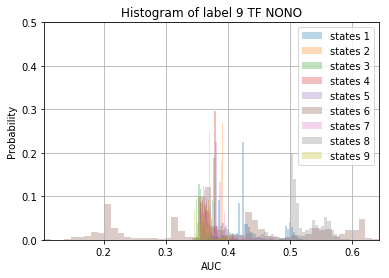

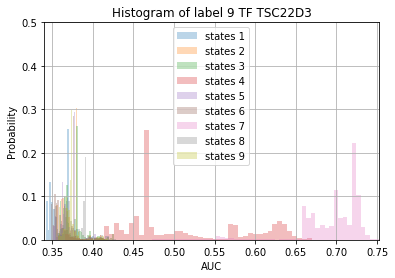

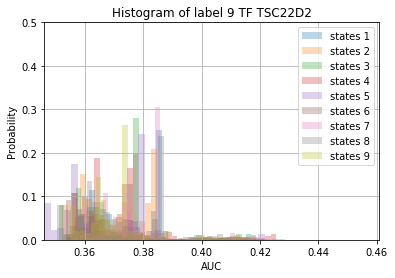

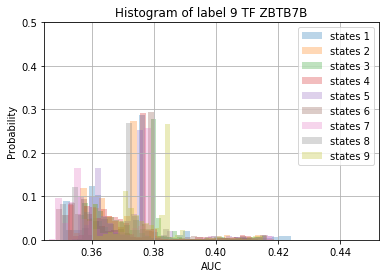

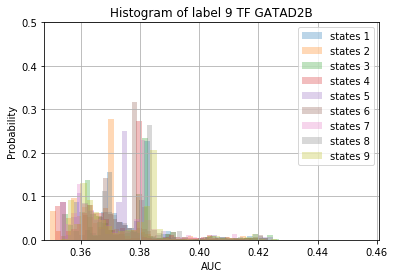

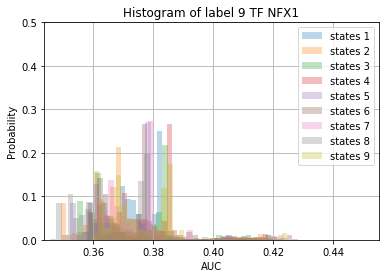

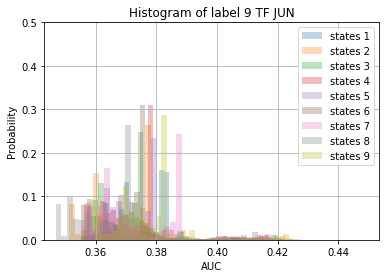

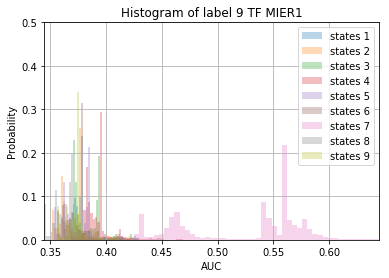

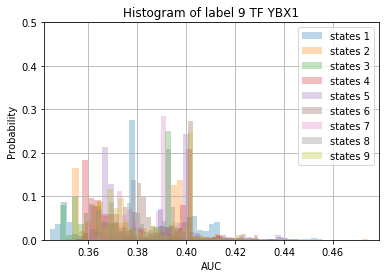

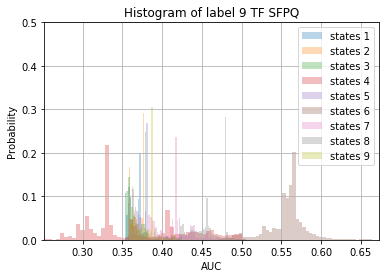

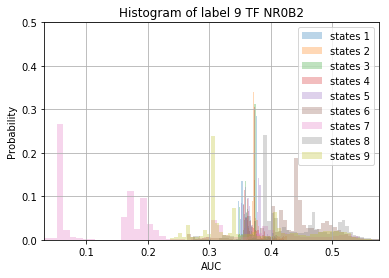

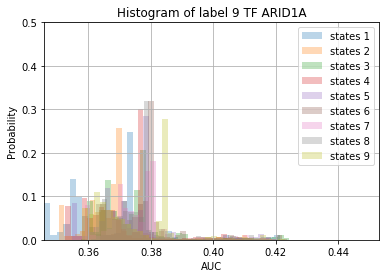

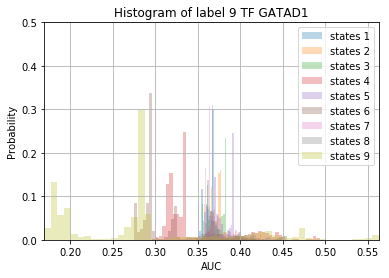

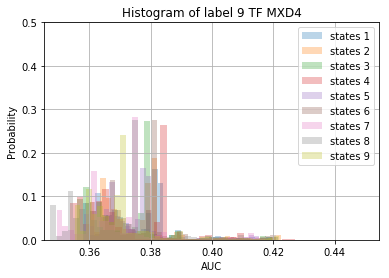

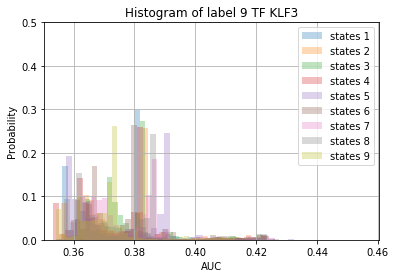

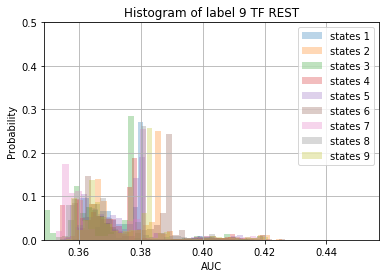

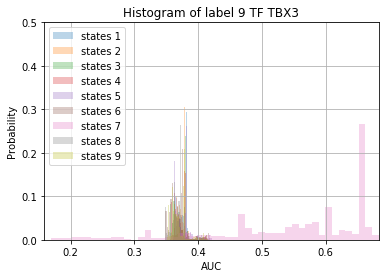

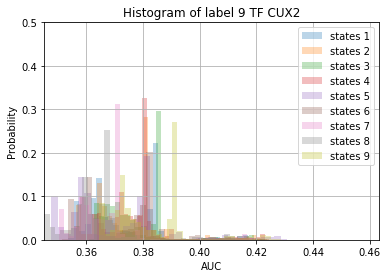

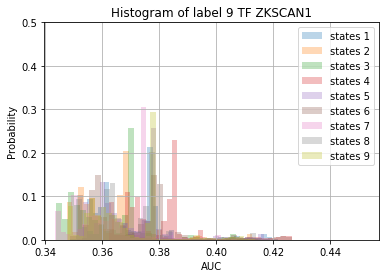

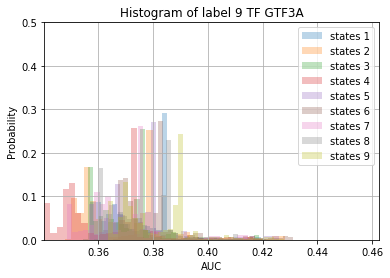

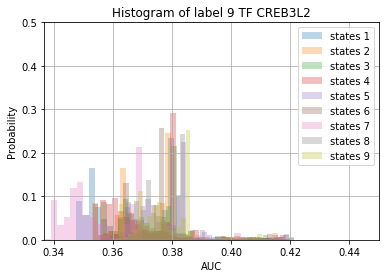

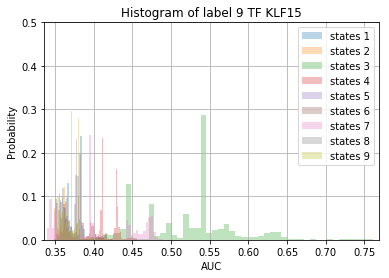

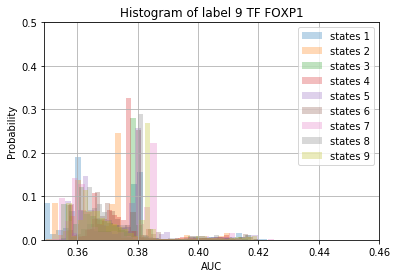

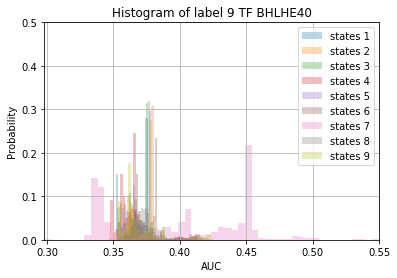

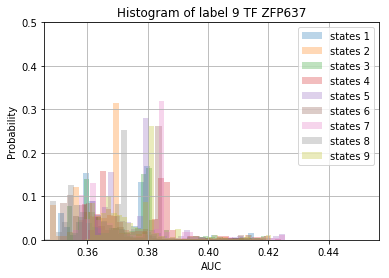

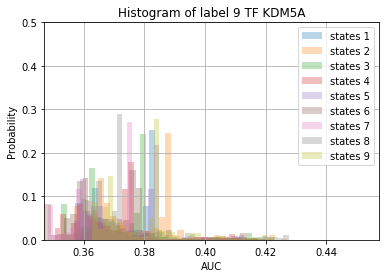

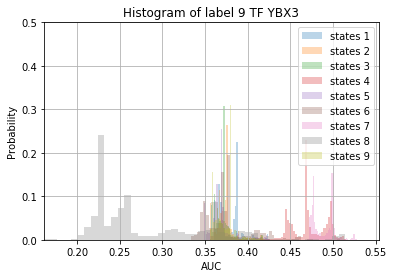

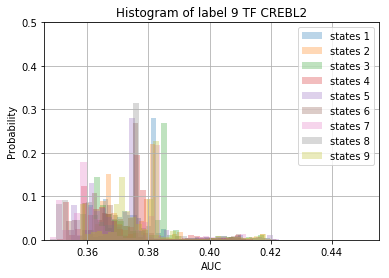

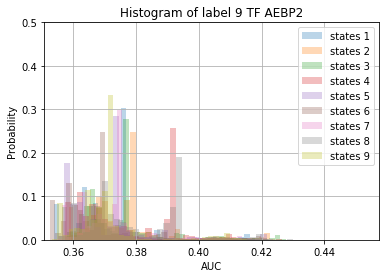

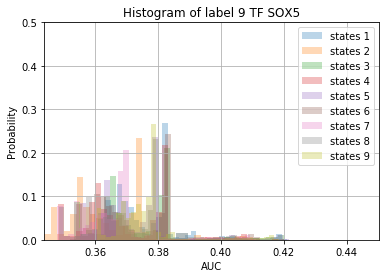

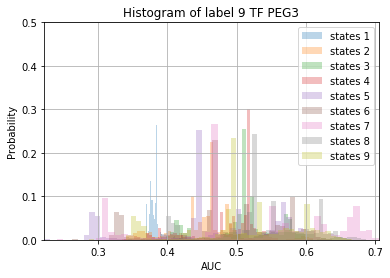

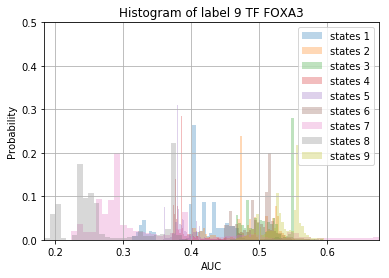

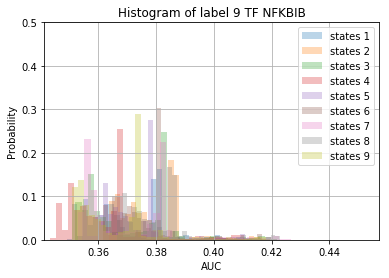

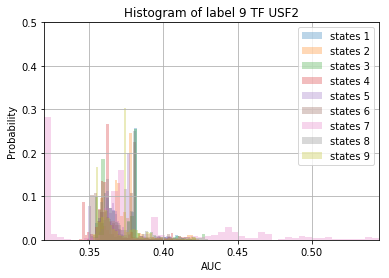

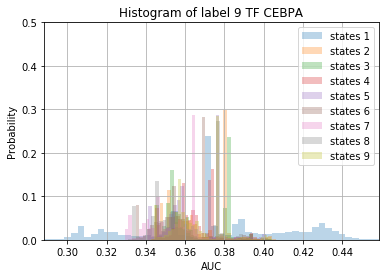

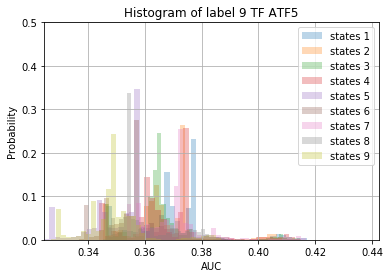

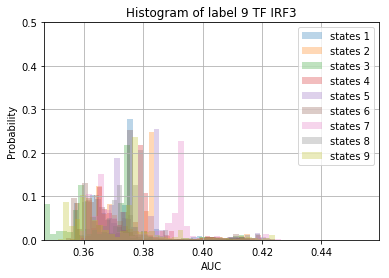

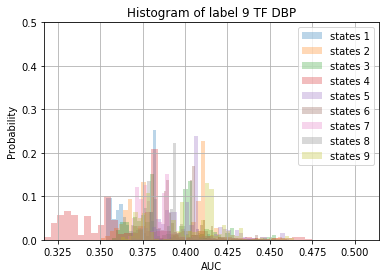

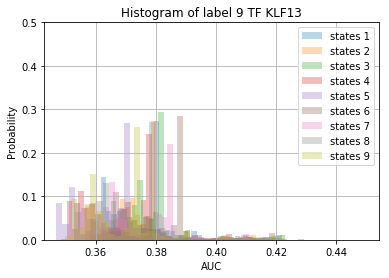

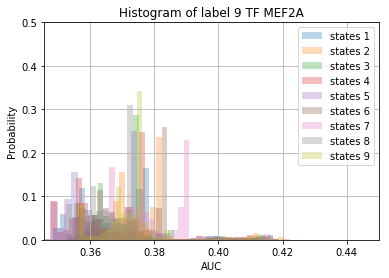

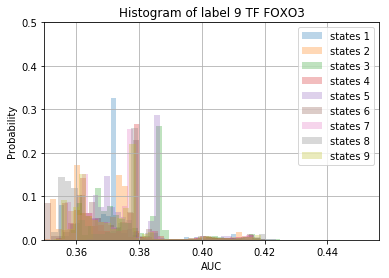

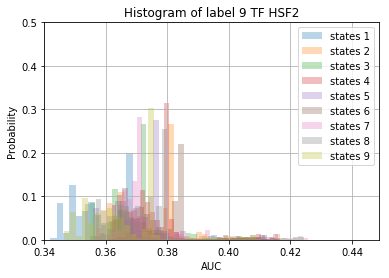

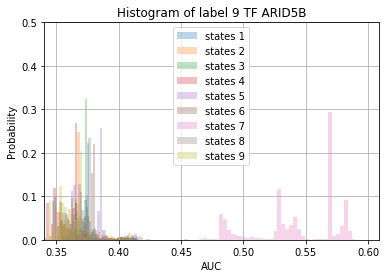

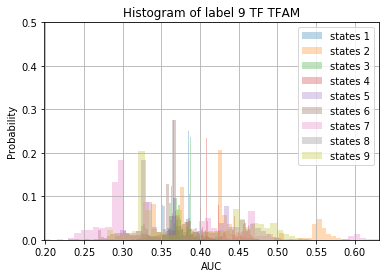

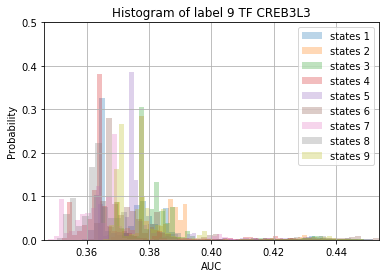

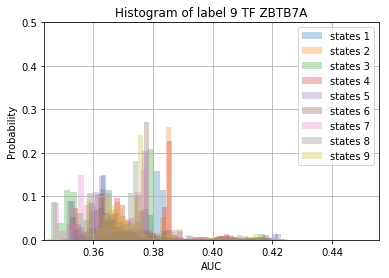

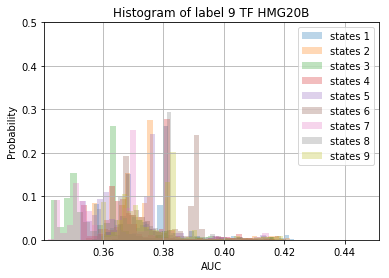

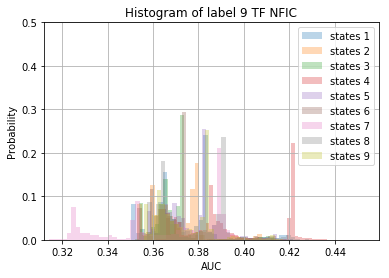

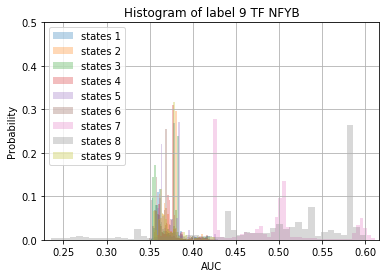

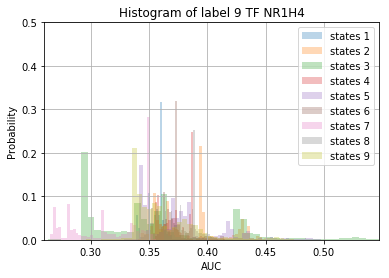

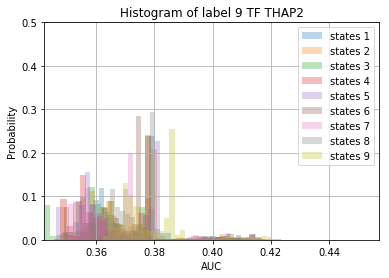

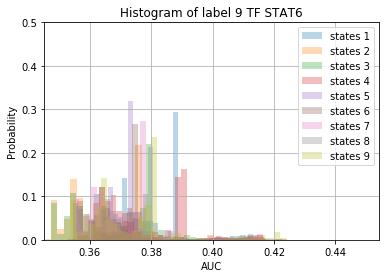

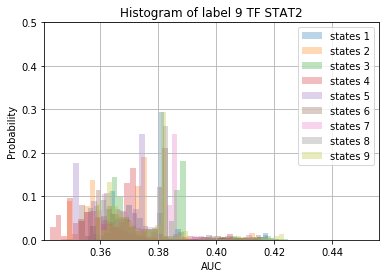

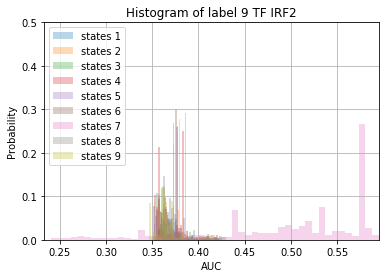

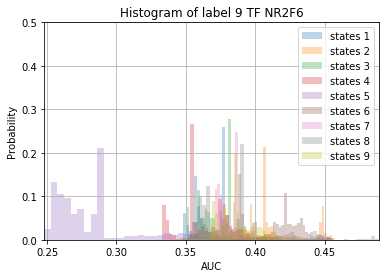

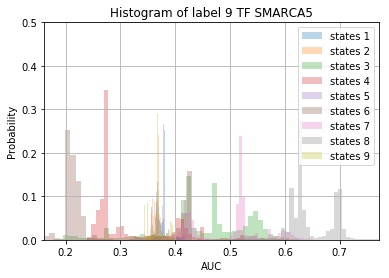

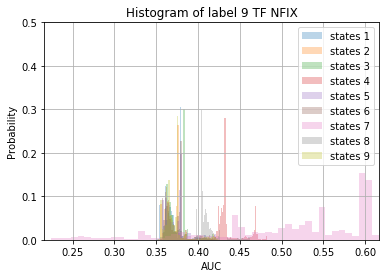

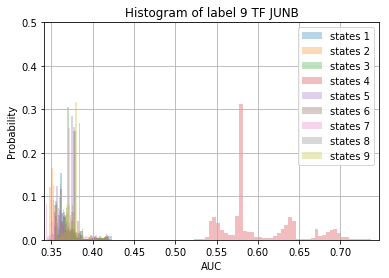

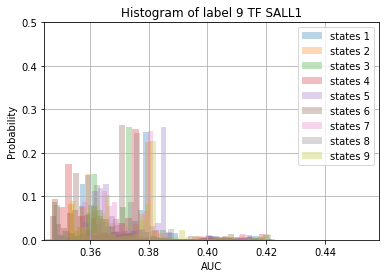

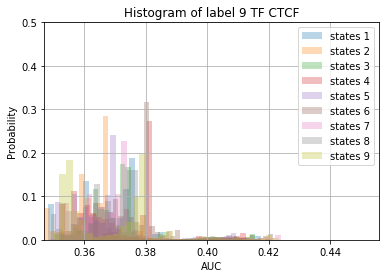

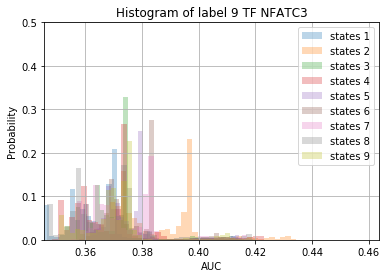

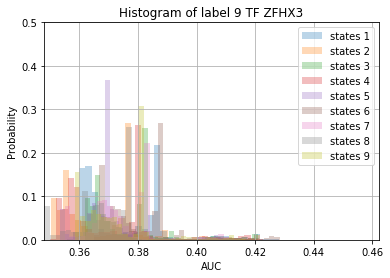

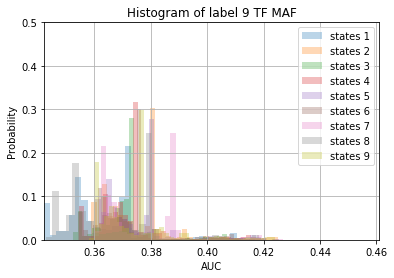

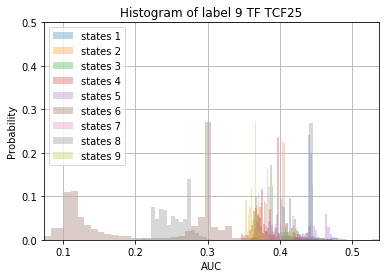

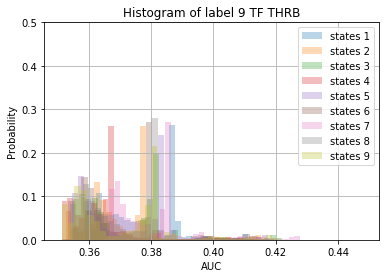

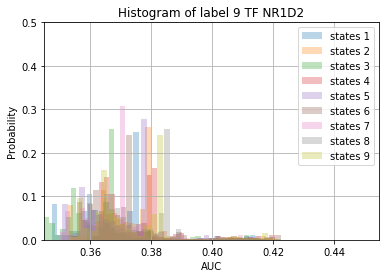

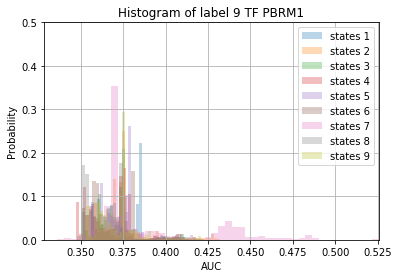

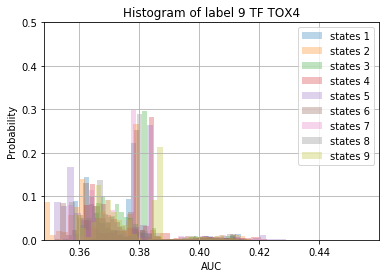

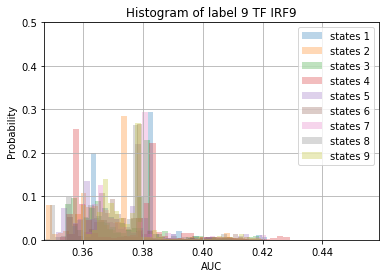

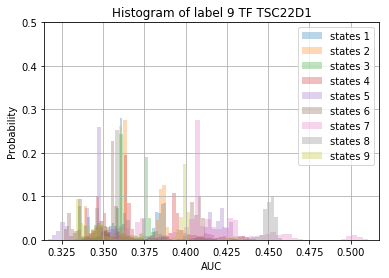

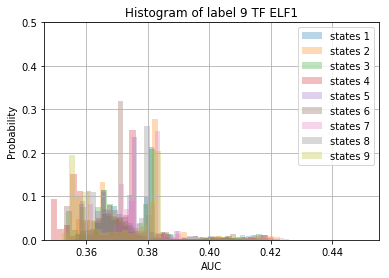

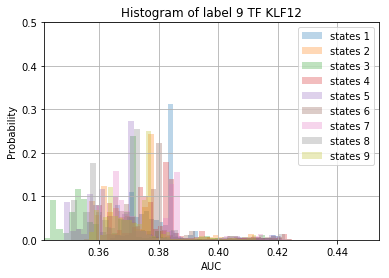

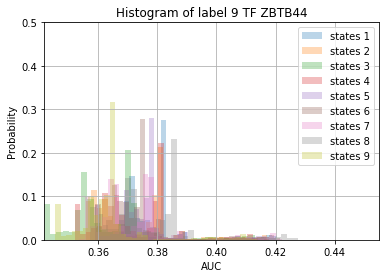

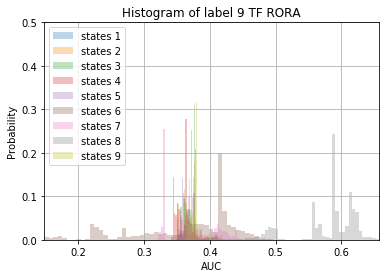

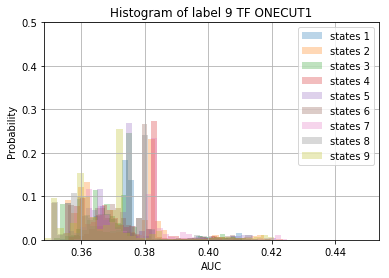

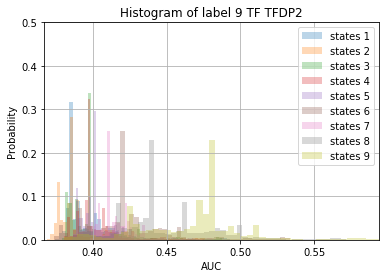

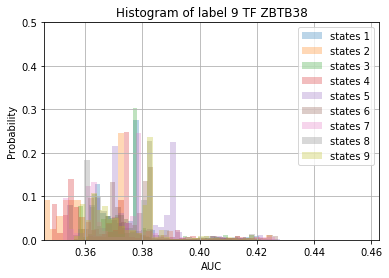

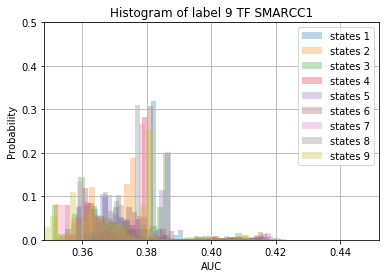

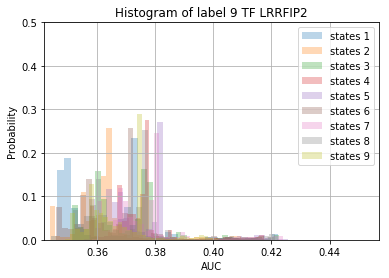

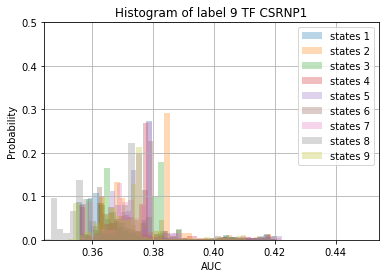

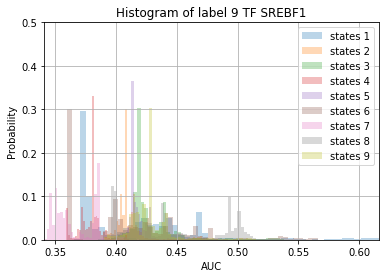

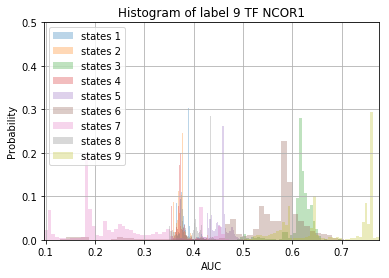

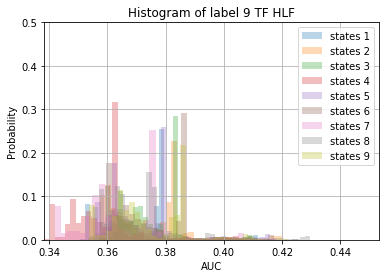

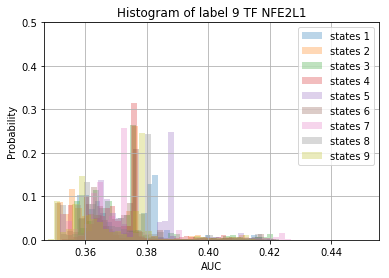

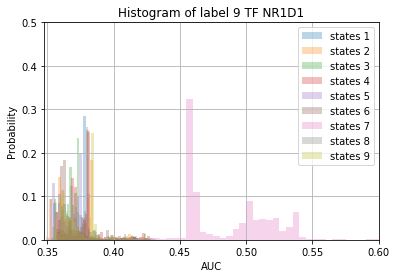

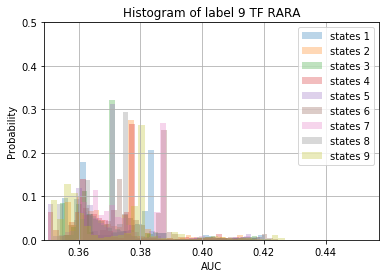

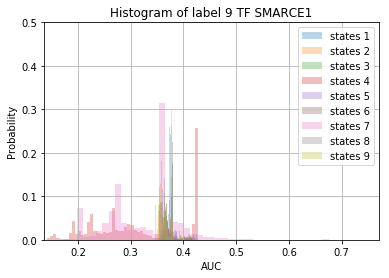

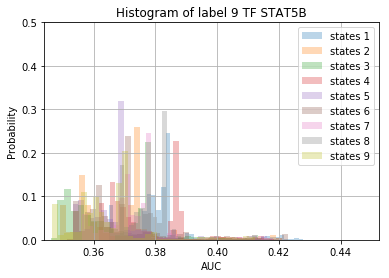

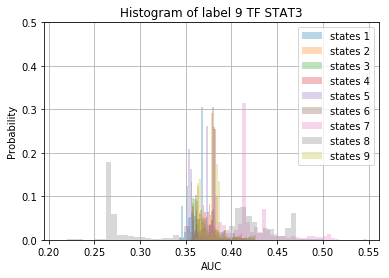

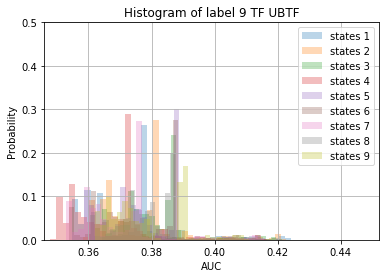

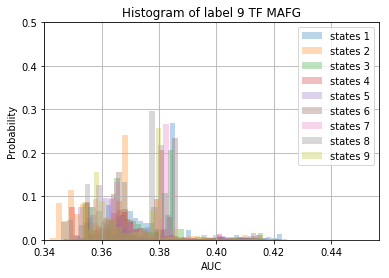

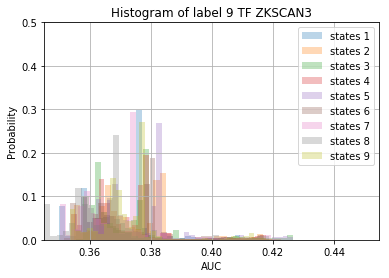

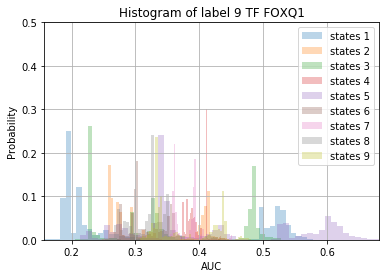

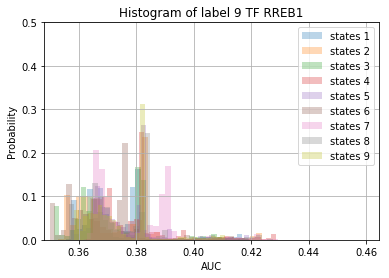

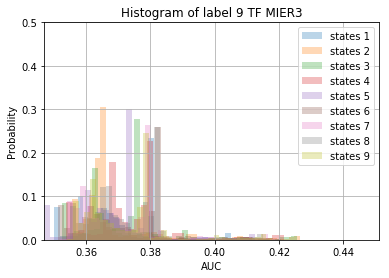

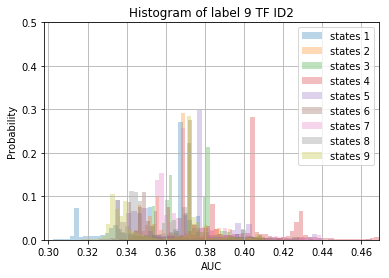

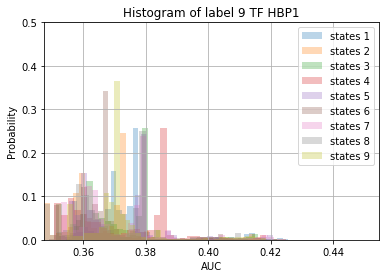

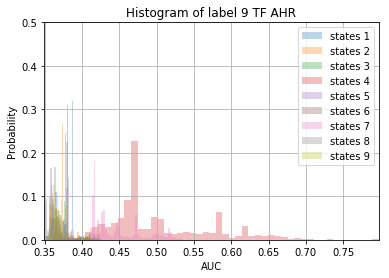

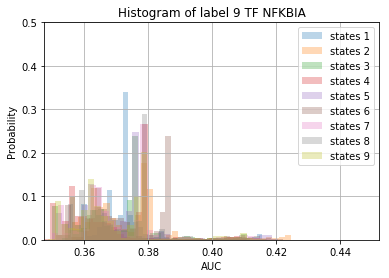

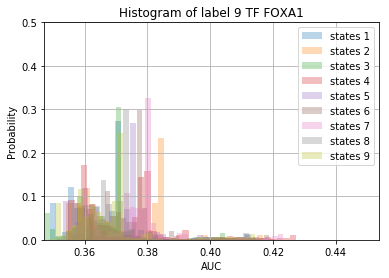

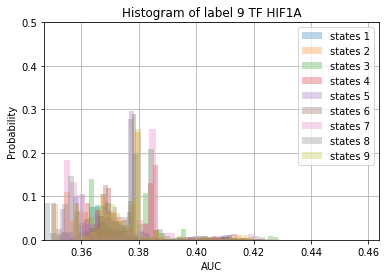

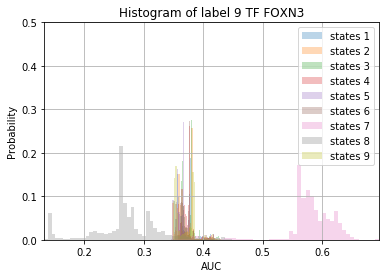

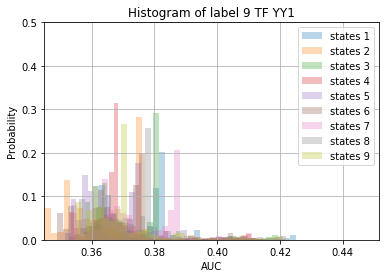

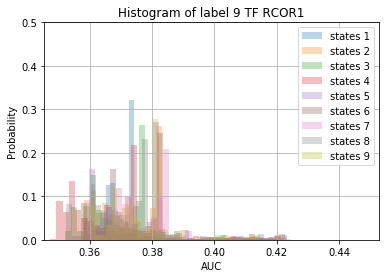

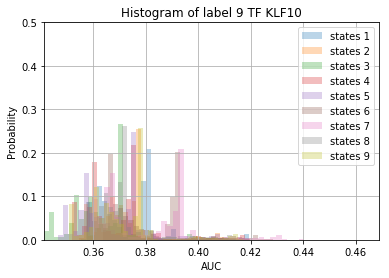

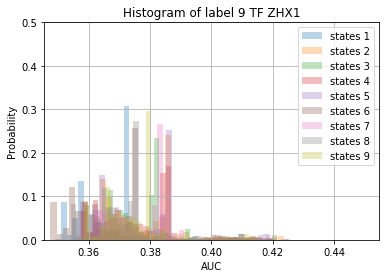

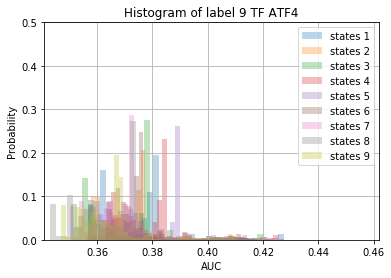

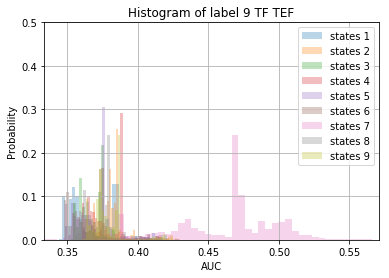

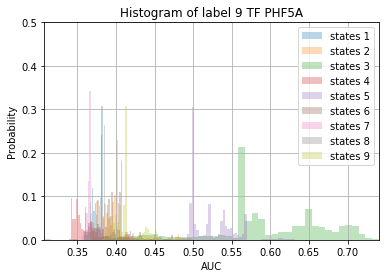

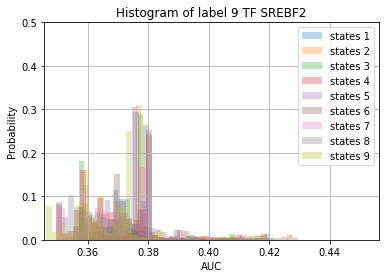

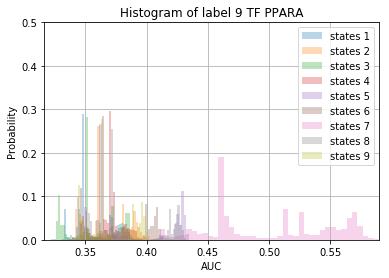

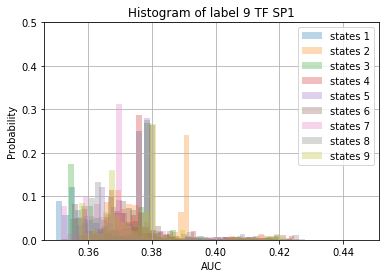

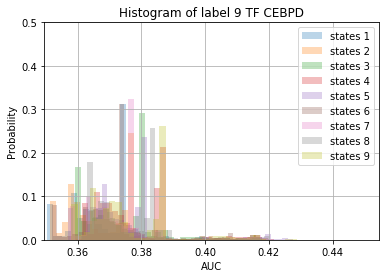

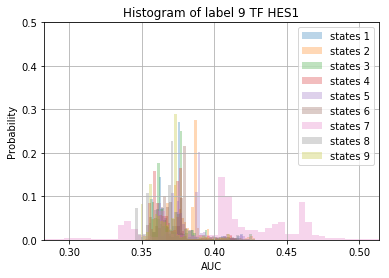

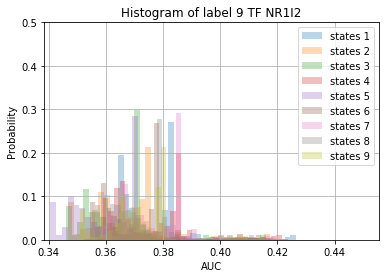

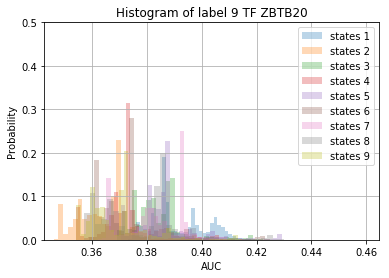

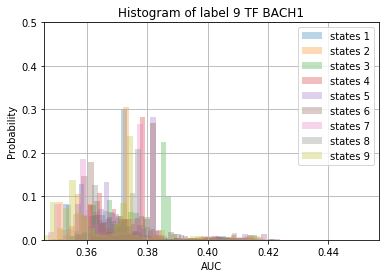

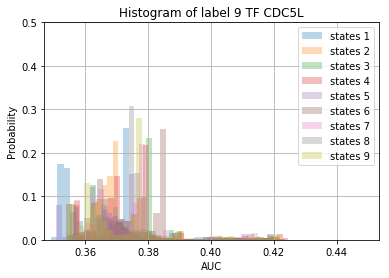

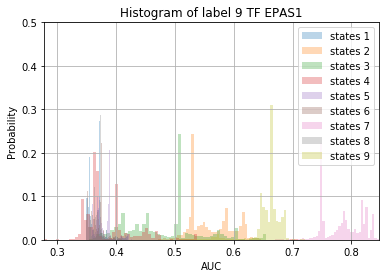

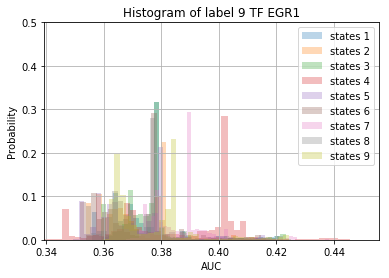

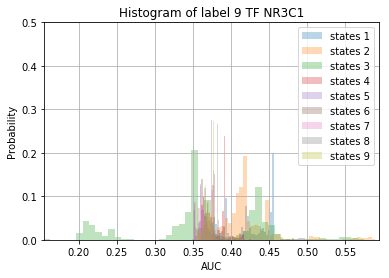

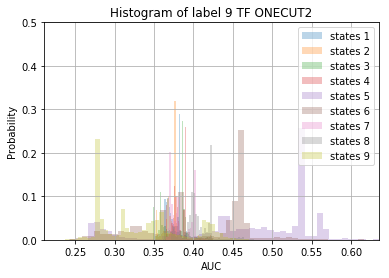

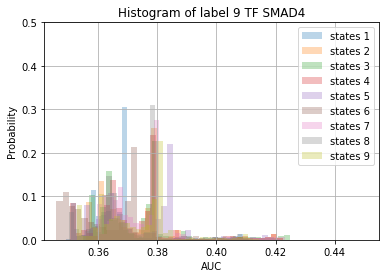

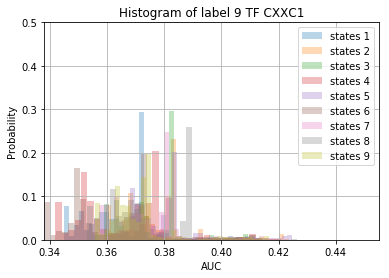

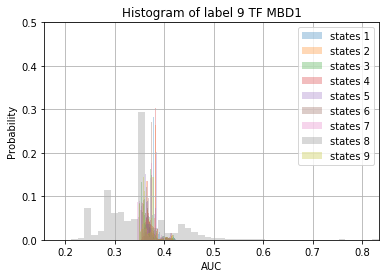

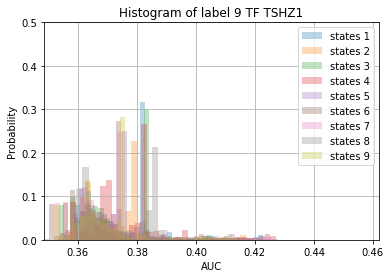

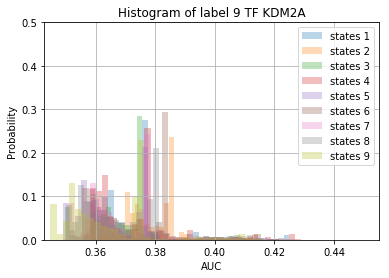

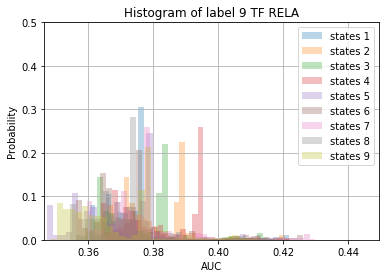

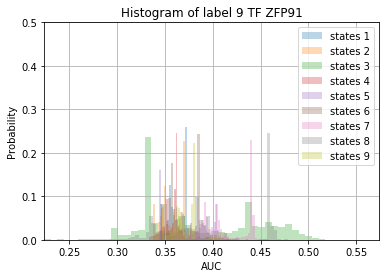

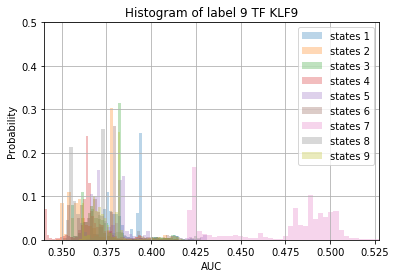

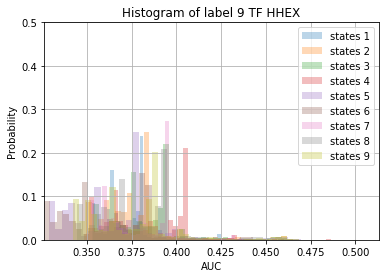

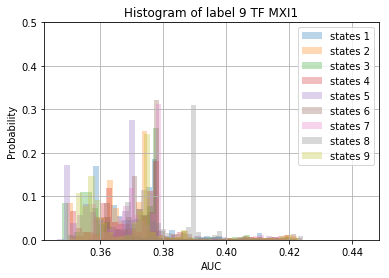

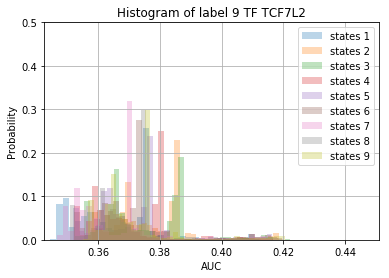

In [35]:
x_min = np.ones(200)
x_max = -1 * np.ones(200)
# find min and max of AUC values in all states.
for label in AUC_dict:
    min_AUC = AUC_dict[label].min(axis = 0)
    max_AUC = AUC_dict[label].max(axis = 0)
    x_min = np.minimum(min_AUC, x_min)
    x_max = np.maximum(max_AUC, x_max)

i = 20
for idx, TF in enumerate(AUC_dict[1].columns):    
#     i -= 1
    for label in AUC_dict:
        AUC_df = AUC_dict[label]      
        x = AUC_df[TF].values.tolist()
        n, bins, patches = plt.hist(x, 50, density = False, alpha = 0.3, 
                                    weights=np.ones(len(x)) / len(x),
                                   label = 'states {}'.format(label))
        plt.xlabel('AUC')
        plt.ylabel('Probability')
        plt.title('Histogram of label {} TF {}'.format(label, TF))
        plt.grid(True)
        plt.xlim(x_min[idx], x_max[idx])
        plt.ylim(0, 0.5)
    plt.legend()
    plt.show()
    
    if i < 0:
        break

------
# Debugging

In [78]:
df_tmp = pd.DataFrame(data = np.random.rand(3, 4), columns = ['a', 'b', 'c', 'd'], index = ['x', 'y', 'z'])

df_test = df_tmp.reset_index(drop = True)
print(df_tmp)
print(df_test)
for row in df_test.iterrows():
    print(type(row[0]))
    print(row[1])

df_test.loc[1] = 0
test_seris = pd.Series([1, 2], index = ['a', 'c'])
df_test.loc[2] = test_seris
df_test.fillna(0)

df_test.sort_values(axis = 1, by = 0, ascending = False)

          a         b         c         d
x  0.933978  0.598364  0.597080  0.480695
y  0.400381  0.830637  0.868357  0.189374
z  0.323163  0.833104  0.046436  0.174509
          a         b         c         d
0  0.933978  0.598364  0.597080  0.480695
1  0.400381  0.830637  0.868357  0.189374
2  0.323163  0.833104  0.046436  0.174509
<class 'int'>
a    0.933978
b    0.598364
c    0.597080
d    0.480695
Name: 0, dtype: float64
<class 'int'>
a    0.400381
b    0.830637
c    0.868357
d    0.189374
Name: 1, dtype: float64
<class 'int'>
a    0.323163
b    0.833104
c    0.046436
d    0.174509
Name: 2, dtype: float64


a         b        c         d
0  0.933978  0.598364  0.59708  0.480695
1  0.000000  0.000000  0.00000  0.000000
2  1.000000       NaN  2.00000       NaN

In [92]:
np.zeros(3)
df_test.loc[1] = [4, 0, 0, 0]

In [96]:
a = [1, 0, 0, 0]
np.sum([np.sum(df_test.fillna(0).loc[1].values[:x+1]) for x in range(4)]) / np.sum(df_test.fillna(0).loc[1]) / 4

1.0

In [94]:
df_test.fillna(0)

a         b        c         d
0  0.933978  0.598364  0.59708  0.480695
1  4.000000  0.000000  0.00000  0.000000
2  1.000000  0.000000  2.00000  0.000000

In [ ]:
# test if notebook keep running after closing window, detach from tmux, and close terminal.
import time

def stopwatch(seconds):
    start = time.time()
    # time.time() returns the number of seconds since the unix epoch.
    # To find the time since the start of the function, we get the start
    # value, then subtract the start from all following values.
    time.clock()    
    # When you first call time.clock(), it just starts measuring
    # process time. There is no point assigning it to a variable, or
    # subtracting the first value of time.clock() from anything.
    # Read the documentation for more details.
    elapsed = 0
    while elapsed < seconds:
        elapsed = time.time() - start
        print("loop cycle time: %f, seconds count: %02d" % (time.clock() , elapsed)) 
        time.sleep(1)  
        # You were sleeping in your original code, so I've stuck this in here...
        # You'll notice that the process time is almost nothing.
        # This is because we are spending most of the time sleeping,
        # which doesn't count as process time.
        # For funsies, try removing "time.sleep()", and see what happens.
        # It should still run for the correct number of seconds,
        # but it will run a lot more times, and the process time will
        # ultimately be a lot more. 
        # On my machine, it ran the loop 2605326 times in 20 seconds.
        # Obviously it won't run it more than 20 times if you use time.sleep(1)

stopwatch(300)

loop cycle time: 0.640000, seconds count: 00
loop cycle time: 0.660000, seconds count: 01
loop cycle time: 0.660000, seconds count: 02
loop cycle time: 0.660000, seconds count: 03
loop cycle time: 0.660000, seconds count: 04
loop cycle time: 0.660000, seconds count: 05


### Conclusion: output from code will not be updated and stored.

# But the code will continue running and saved the variable.
-----

In [ ]:
from time import sleep
file = open("jupyter_tab_close_test", "w")
file.close()
i = 0
while i < 300:
    print("{}\n".format(i))
    i +=1
    with open("jupyter_tab_close_test", "a") as f:
        f.write("{}\n".format(i))
    sleep(1)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48



In [5]:
print(i)

300
